# Machine Learning Project for Forecasting of Agricultual CO2 emissions to mitigate Climate Change

##### The dataset contains of 6,940 rows and 29 columns, was created for a project investigating the relationship between CO2 emissions and temperature fluctuations in various countries from 1990 to 2020. The data was gathered from the FAO (Food and Agriculture Organization of the United Nations) and IPCC (Intergovernmental Panel on Climate Change). Emissions values were recorded in kilotons (kt), where 1kt equals 1000 kg.

Description about each attribute:

1. **Savanna fires:** Emissions arising from fires occurring in savanna ecosystems.

2. **Forest fires:** Emissions resulting from fires in forested regions.

3. **Crop Residues:** Emissions generated by burning or decomposing leftover plant material after crop harvesting.

4. **Rice Cultivation:** Emissions stemming from methane released during the cultivation of rice.

5. **Drained organic soils (CO2):** Emissions derived from carbon dioxide released when draining organic soils.

6. **Pesticides Manufacturing:** Emissions originating from the production of pesticides.

7. **Food Transport:** Emissions associated with the transportation of food products.

8. **Forestland:** The extent of land covered by forests.

9. **Net Forest conversion:** Changes in forest area resulting from both deforestation and afforestation.

10. **Food Household Consumption:** Emissions arising from the consumption of food at the household level.

11. **Food Retail:** Emissions linked to the operation of retail establishments selling food.

12. **On-farm Electricity Use:** Energy consumption for electricity on farms.

13. **Food Packaging:** Emissions originating from the production and disposal of food packaging materials.

14. **Agrifood Systems Waste Disposal:** Emissions from the disposal of waste in the agrifood system.

15. **Food Processing:** Emissions associated with the processing of food products.

16. **Fertilizers Manufacturing:** Emissions originating from the production of fertilizers.

17. **IPPU:** Emissions from industrial processes and product use.

18. **Manure applied to Soils:** Emissions resulting from the application of animal manure to agricultural soils.

19. **Manure left on Pasture:** Emissions associated with animal manure on pasture or grazing land.

20. **Manure Management:** Emissions linked to the management and treatment of animal manure.

21. **Fires in organic soils:** Emissions arising from fires occurring in organic soils.

22. **Fires in humid tropical forests:** Emissions resulting from fires in humid tropical forests.

23. **On-farm energy use:** Energy consumption on farms.

24. **Rural population:** The number of people residing in rural areas.

25. **Urban population:** The number of people residing in urban areas.

26. **Total Population - Male:** The overall count of male individuals in the population.

27. **Total Population - Female:** The overall count of female individuals in the population.

28. **total_emission:** The total greenhouse gas emissions from various sources.

29. **Average Temperature °C (target):** The average temperature increase (per year) measured in degrees Celsius.

In [1]:
#Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Dataset Input from Kaggle

In [2]:
emission_data = pd.read_csv("Agrofood_co2_emission.csv")
emission_data

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000                          0.0                 11.807483   
1             678.1600                          0.0                 11.712073   
2             686.0000                          0.0                 11.712073   
3             686.0000                          0.0                 11.712073   
4             705.6000                          0.0                 11.712073   
...                ...                          ...                       ...   
6960            7.4088                          0.0                 75.000000   
6961            7.9458                          0.0                 67.000000   
6962            8.1399                          0.0                 66.000000   
6963            7.8322                          0.0                 73.000000   
6964            7.9733                          0.0                 73.000000   

      Food Transport  Forestland  ...  Manure Management  \
0            63.1152  -2388.8030  ...           319.1763   
1            61.2125  -2388.8030  ...           342.3079   
2            53.3170  -2388.8030  ...           349.1224   
3            54.3617  -2388.8030  ...           352.2947   
4            53.9874  -2388.8030  ...           367.6784   
...              ...         ...  ...                ...   
6960        251.1465  76500.2982  ...           282.5994   
6961        255.7975  76500.2982  ...           255.5900   
6962        327.0897  76500.2982  ...           257.2735   
6963        290.1893  76500.2982  ...           267.5224   
6964        238.7639  76500.2982  ...           266.7316   

      Fires in organic soils  Fires in humid tropical forests  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   
...                      ...                              ...   
6960                     0.0                              0.0   
6961                     0.0                              0.0   
6962                     0.0                              0.0   
6963                     0.0                              0.0   
6964                     0.0                              0.0   

      On-farm energy use  Rural population  Urban population  \
0                    NaN         9655167.0         2593947.0   
1                    NaN        10230490.0         2763167.0   
2                    NaN        10995568.0         2985663.0   
3                    NaN        11858090.0         3237009.0   
4                    NaN        12690115.0         3482604.0   
...                  ...               ...               ...   
6960            417.3150        10934468.0         5215894.0   
6961            398.1644        11201138.0         5328766.0   
6962            465.7735        11465748.0         5447513.0   
6963            444.2335        11725970.0   

## Handling the missing data

On analysis of the dataset, we saw that for some countries the values of a certain were either not recorded or they are missing.

To handle this and affect the model training and predicitons we will be replacing all the null values with 0 so they dont convey any other meaning while model training.

In [3]:
emission_data.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [4]:
recorded_years = emission_data["Year"].unique()
print(recorded_years)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]


In [5]:
num_of_countries = emission_data['Area'].unique()
count = 0
for i in num_of_countries:
    count += 1
print('The number of Area that is considered in this dataset are: ', count)

The number of Area that is considered in this dataset are:  236


## Data Cleaning

The dataset has been preprocessed for analysis and forecasting but there are still some missing data.
We look at them one by one and decide the best cleaning practice.

There are 11 categories with missing data and 3 of them where the data can be set to zero with high confidence. These are the Savanna and Forest fires and Fires in humid tropical forests.
We have to make the assumption that due to conservation efforts the Net Forest Conversion is close to zero in the countries where we have no data. These are mainly tropical islands, small islands, city states or mostly desert country (UAE).
Hence assuming that the Forestland hasn't changed significantly as we set the Net Forest Conversion to zero.
The rest of the dataset has missing values for most of the 31 years of period

In [6]:
# Filling all missing values with zeros in the lack of information
emission_data.fillna(value = 0, inplace = True)

# Multiply the values by -1 where positive in the Forestland
emission_data['Forestland'] = np.where(emission_data['Forestland'] > 0, emission_data['Forestland']*(-1), emission_data['Forestland'])

# Check the integrity of our data - the sum of the numerical values of each industry in each row
# should be equal to the total emission.
integrity_check = emission_data.iloc[:,2:25].sum(axis = 1)
equ = emission_data['total_emission'] - integrity_check

equ = round(equ, 10)
equ = pd.DataFrame(equ)
diff = equ[equ[0] > 0]
diff

0
11       243.8032
12       243.8032
13       243.8032
14       243.8032
15       243.8032
...           ...
6960  153000.5964
6961  153000.5964
6962  153000.5964
6963  153000.5964
6964  153000.5964

[698 rows x 1 columns]

In [7]:
# As the data has been changed we need to adjust the total emission by subtracting the values that we changed
# to minus from the total emission to keep the data integrity.
emission_data['total_emission'] = np.where(round(emission_data['total_emission'] - integrity_check, 10) > 0,
(emission_data['total_emission']- round(emission_data['total_emission'] - integrity_check, 10)), emission_data['total_emission'])

integrity_rural_urban = emission_data.iloc[:,26:27].sum(axis = 1)
integrity_male_female = emission_data.iloc[:,28:29].sum(axis = 1)
pop_equ = integrity_rural_urban - integrity_male_female
pop_equ = pd.DataFrame(pop_equ)
pop = pd.DataFrame(np.where(pop_equ[0] == 0, True, False))
pop.value_counts()

False    6965
Name: count, dtype: int64

It seems that the rural and urban population sum doesn't match with the sum of the total female and male population. Hence we have to choose which columns to keep to have a consistent data

In [8]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

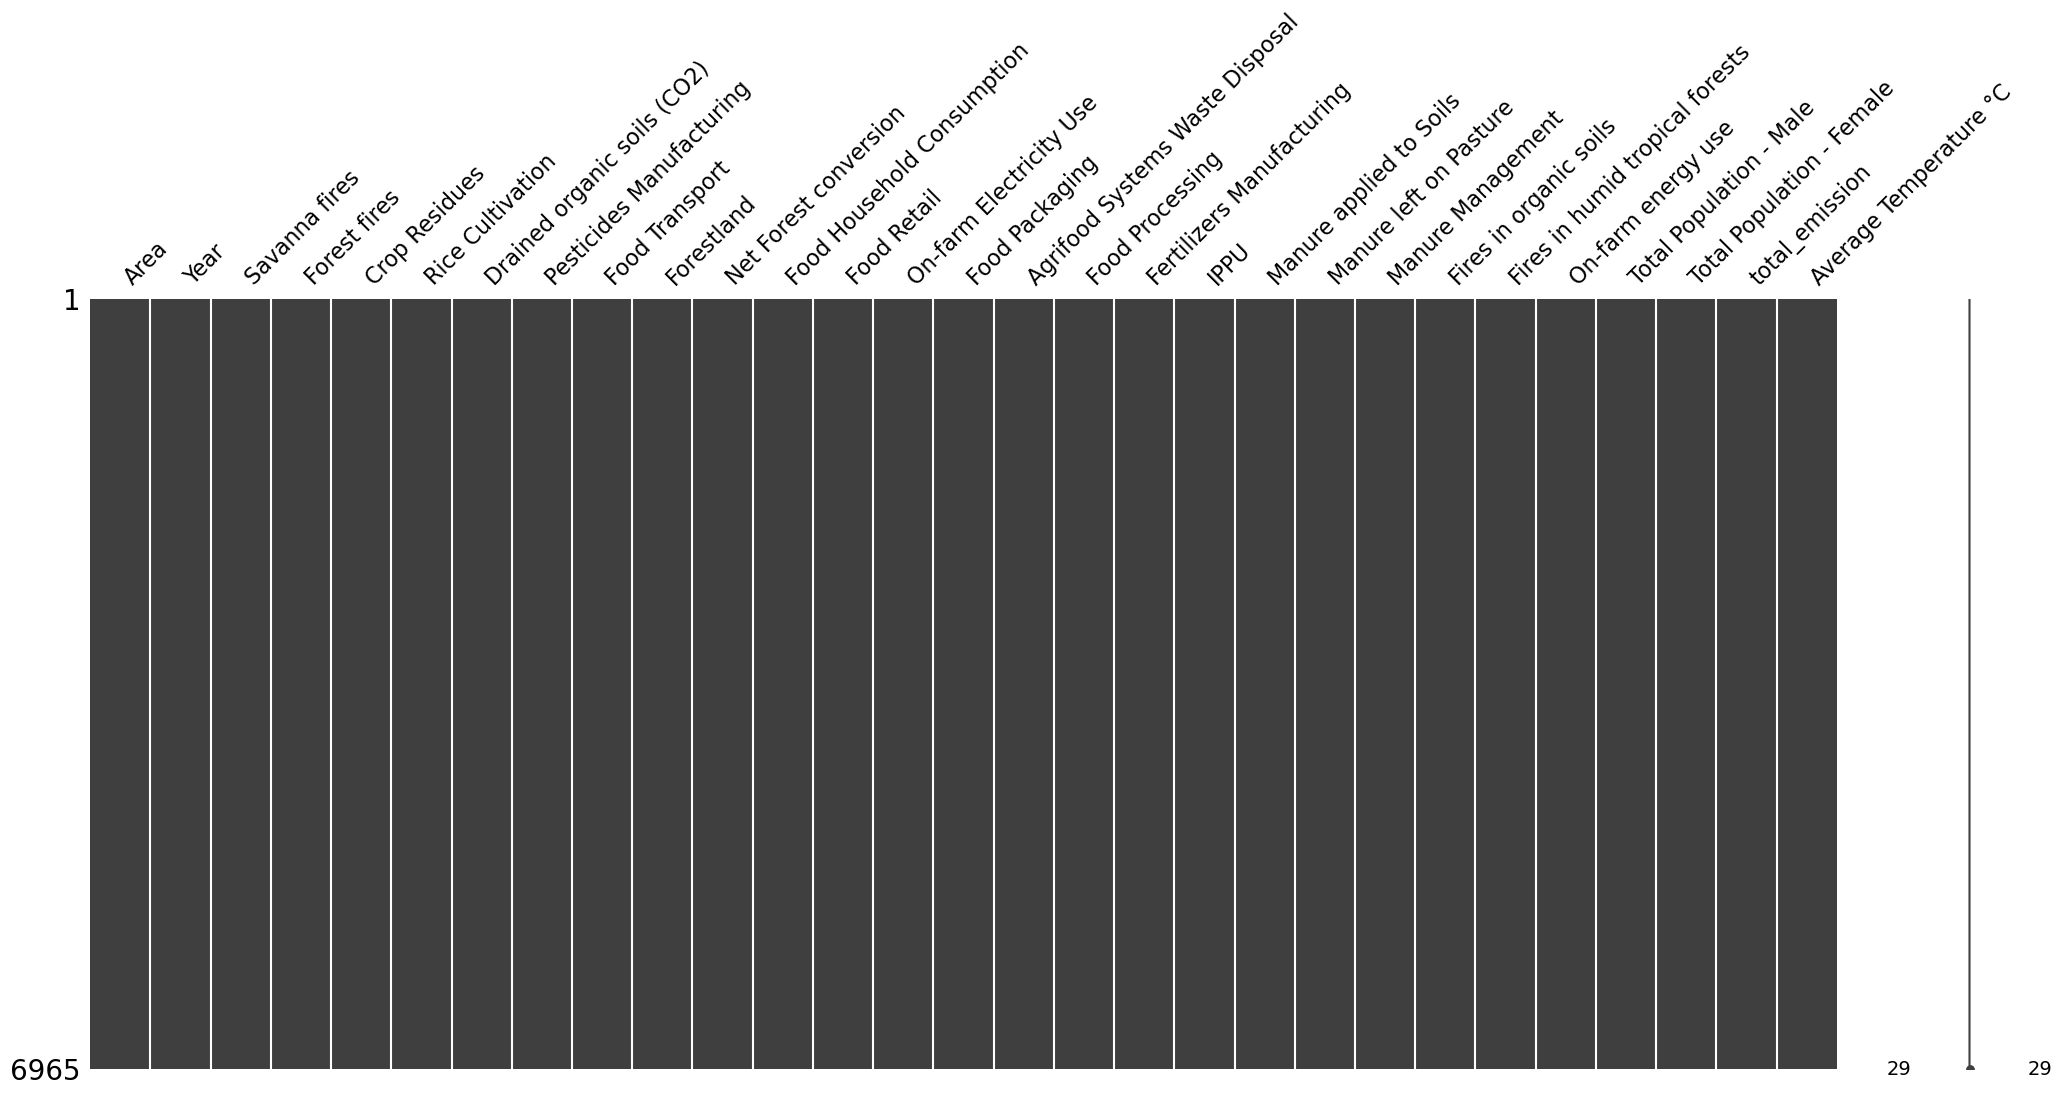

In [9]:
import missingno as msno
emission_data.drop(['Rural population','Urban population'], inplace = True, axis = 1)

msno.matrix(emission_data)

Adding an extra column to the dataset for the total population, calculated from the total male and female population for each year.

In [10]:
print(emission_data.columns)

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Total Population - Male', 'Total Population - Female',
       'total_emission', 'Average Temperature °C'],
      dtype='object')


We add where the country is located by continent and region.



In [11]:
import json

continents = json.load(open('continents.json','r'))
world_regions = json.load(open('world_regions.json','r'))

def assign_continent(area):
    for continent, country in continents.items():
        if area in country:
            return continent

emission_data['Continents'] = emission_data.loc[:,'Area'].apply(assign_continent)

def assign_region(area):
    for continent, country in world_regions.items():
        if area in country:
            return continent
emission_data['World_regions'] = emission_data.loc[:,'Area'].apply(assign_region)

In [12]:
emission_data['total_population'] = emission_data['Total Population - Male'] + emission_data['Total Population - Female']


We exclude Chine from the dataset as it's a duplicate. China here represents the mainland and the territorial parts like Macao, Hond Kong etc that included in the dataset separately.

In [13]:
emission_data = emission_data[emission_data['Area'] != 'China']

## EDA

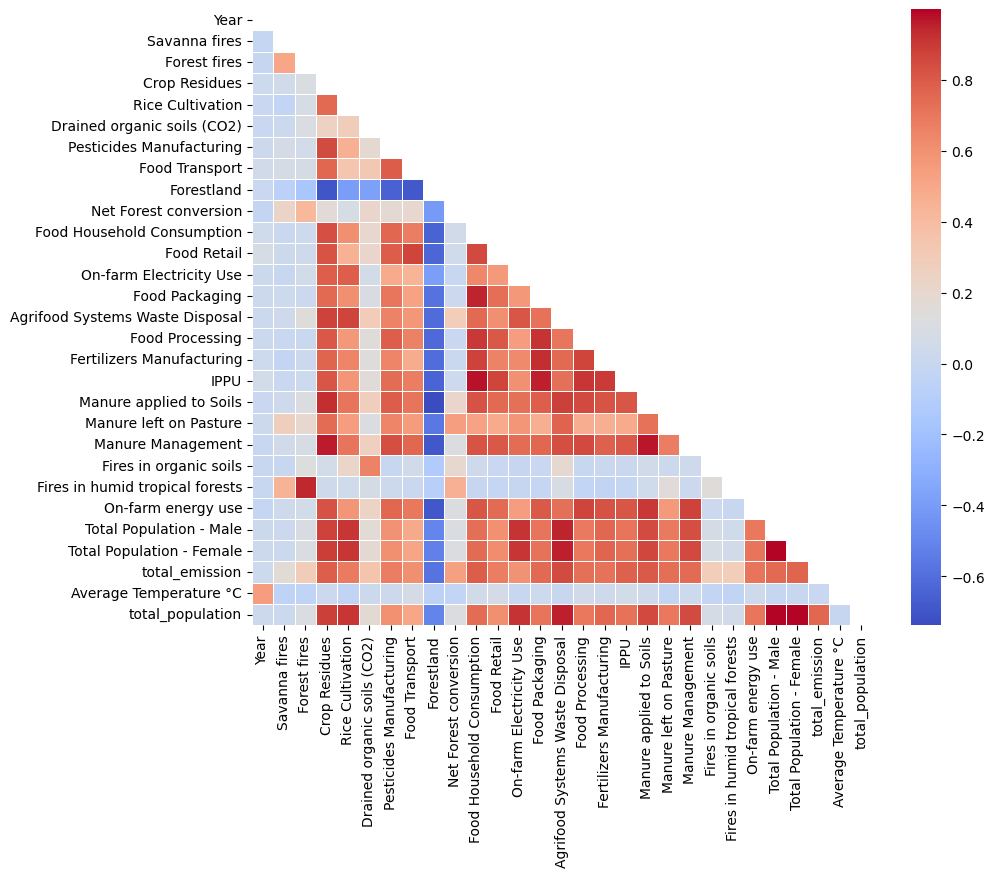

In [14]:
# Identify numeric columns in the DataFrame
numeric_columns = emission_data.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
correlation_matrix = emission_data[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a mask for the upper triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap using seaborn with the mask
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=.5, mask=mask)

# Show the plot
plt.show()

## EDA - Data Visualization

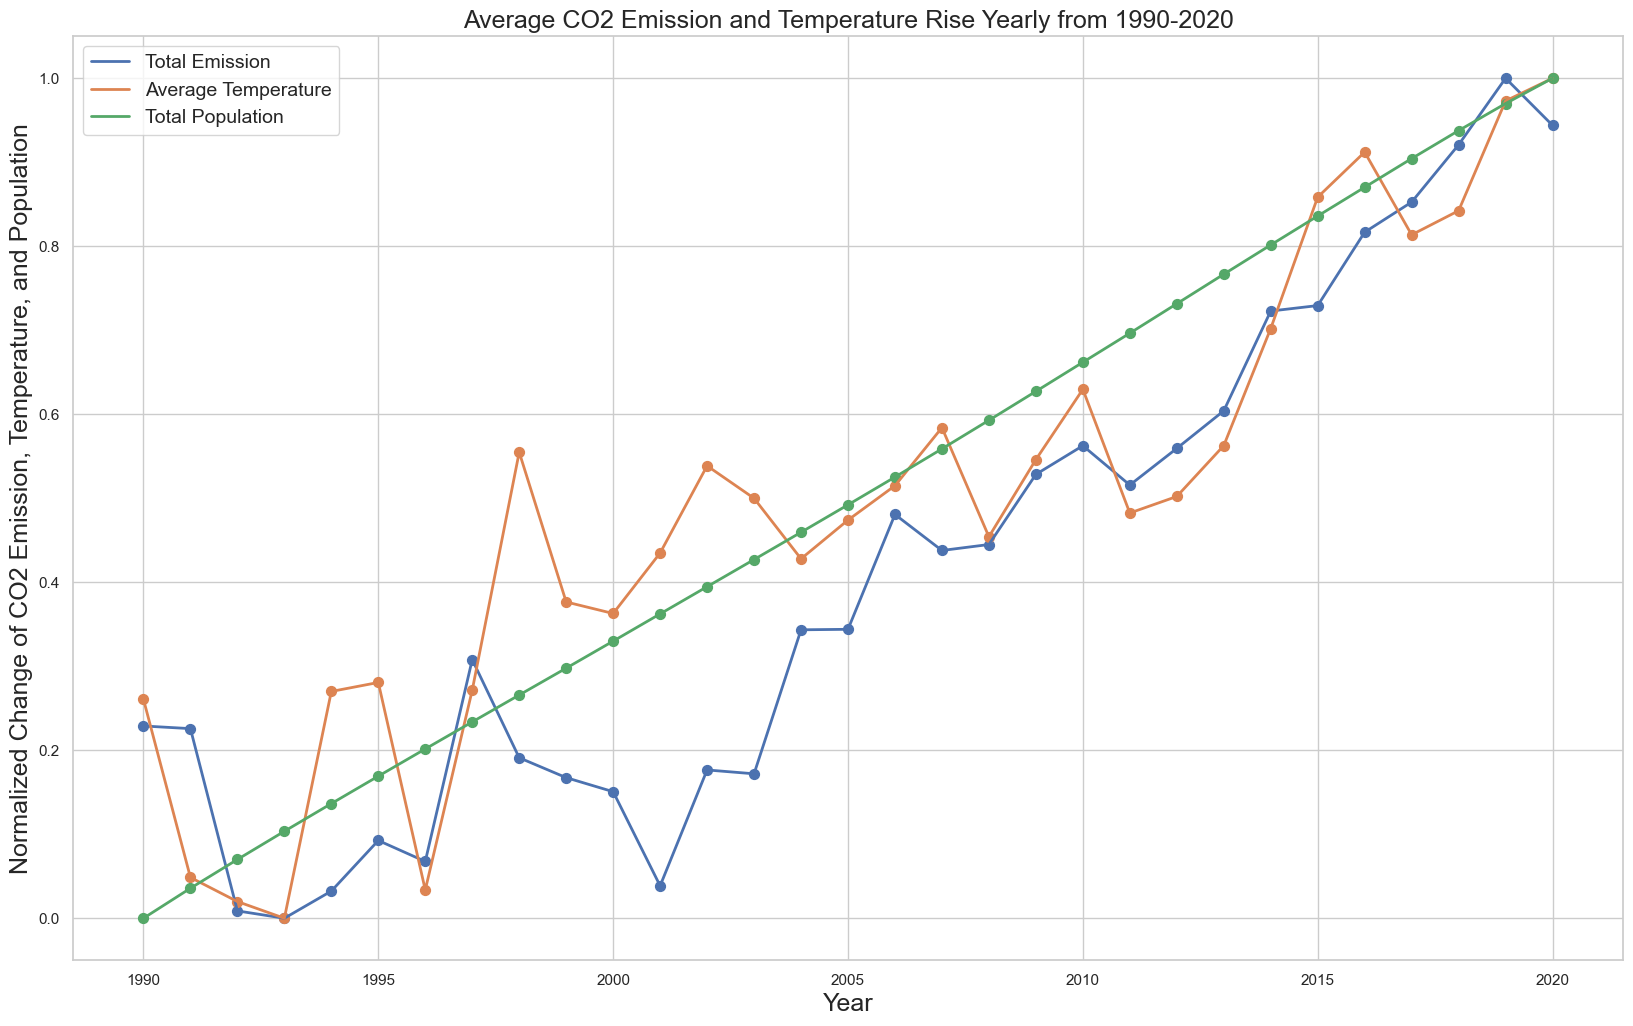

In [48]:
plt.figure(figsize=(20, 12))

# Plot the line plot
plt.plot(emission_data_year_norm.index, emission_data_year_norm['total_emission'], label='Total Emission', linewidth=2)
plt.plot(emission_data_year_norm.index, emission_data_year_norm['Average Temperature °C'], label='Average Temperature', linewidth=2)
plt.plot(emission_data_year_norm.index, emission_data_year_norm['Total_Population'], label='Total Population', linewidth=2)

# Plot the scatter plot
plt.scatter(emission_data_year_norm.index, emission_data_year_norm['total_emission'], s=50)
plt.scatter(emission_data_year_norm.index, emission_data_year_norm['Average Temperature °C'], s=50)
plt.scatter(emission_data_year_norm.index, emission_data_year_norm['Total_Population'], s=50)

plt.title('Average CO2 Emission and Temperature Rise Yearly from 1990-2020', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Normalized Change of CO2 Emission, Temperature, and Population', fontsize=18)
plt.legend(fontsize=14)
plt.show()


From the graph above it can be seen that there is a direct correlation between the CO2 emission with temperature rise and the population growth.
These emissions only about 1/5th of the total CO2 emission wordwide but the direct proportionality and upward trend can be seen from this dataset as well.

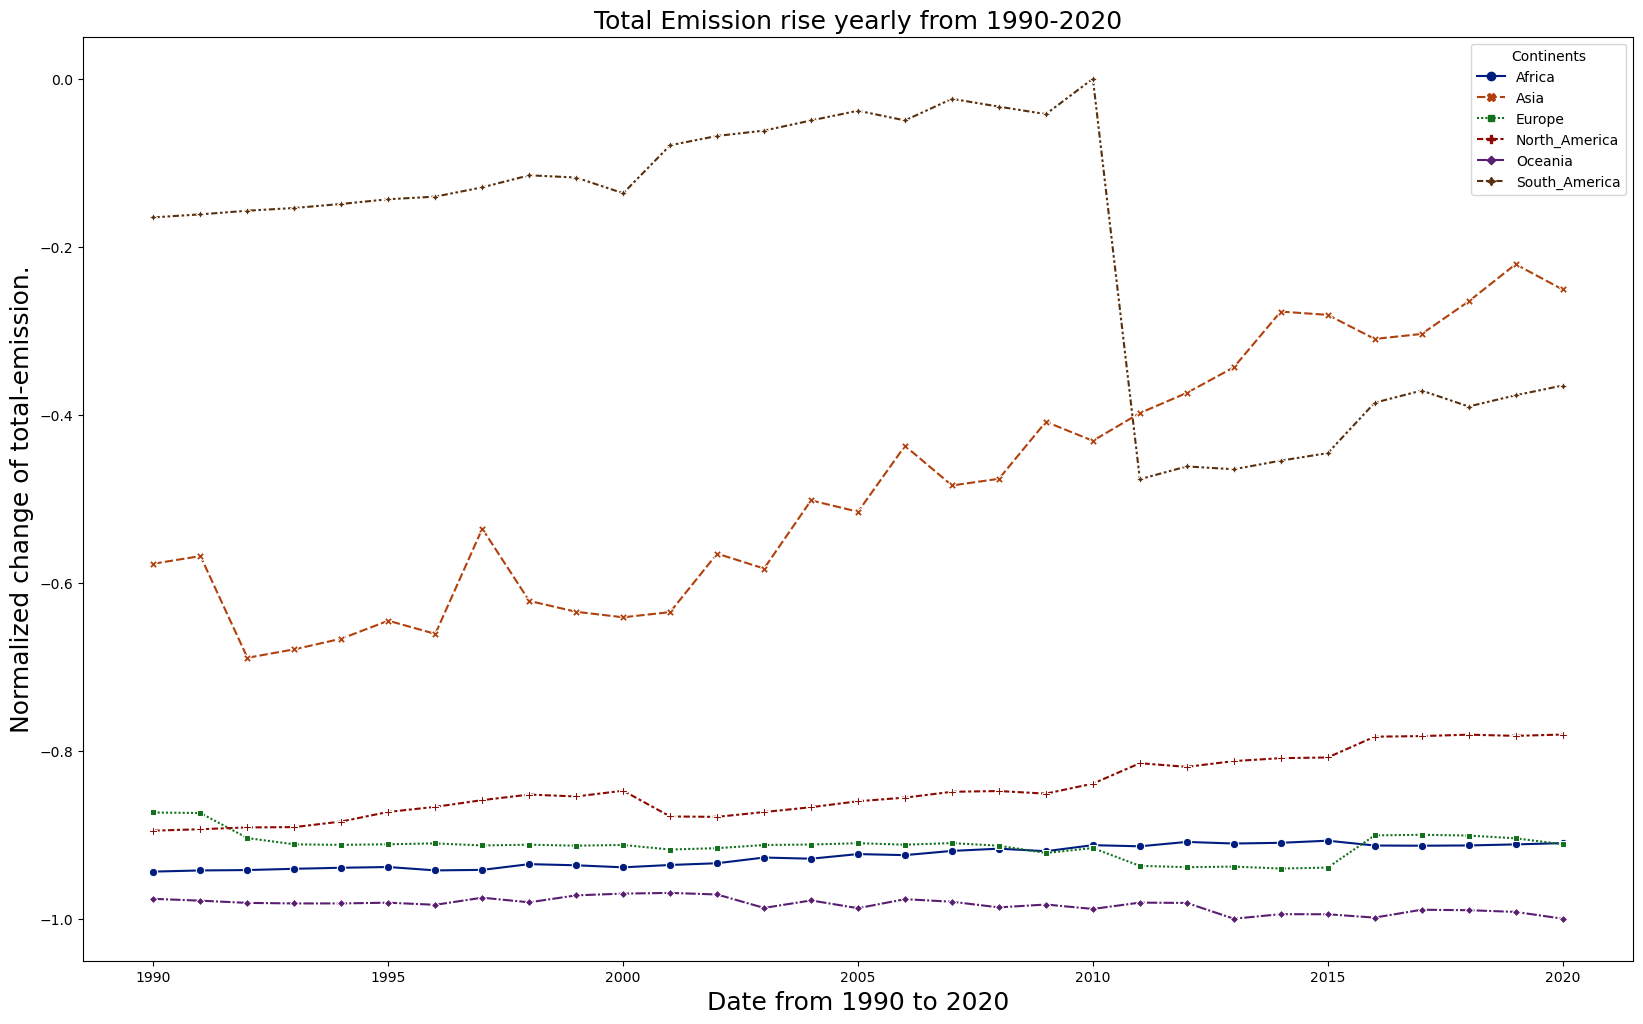

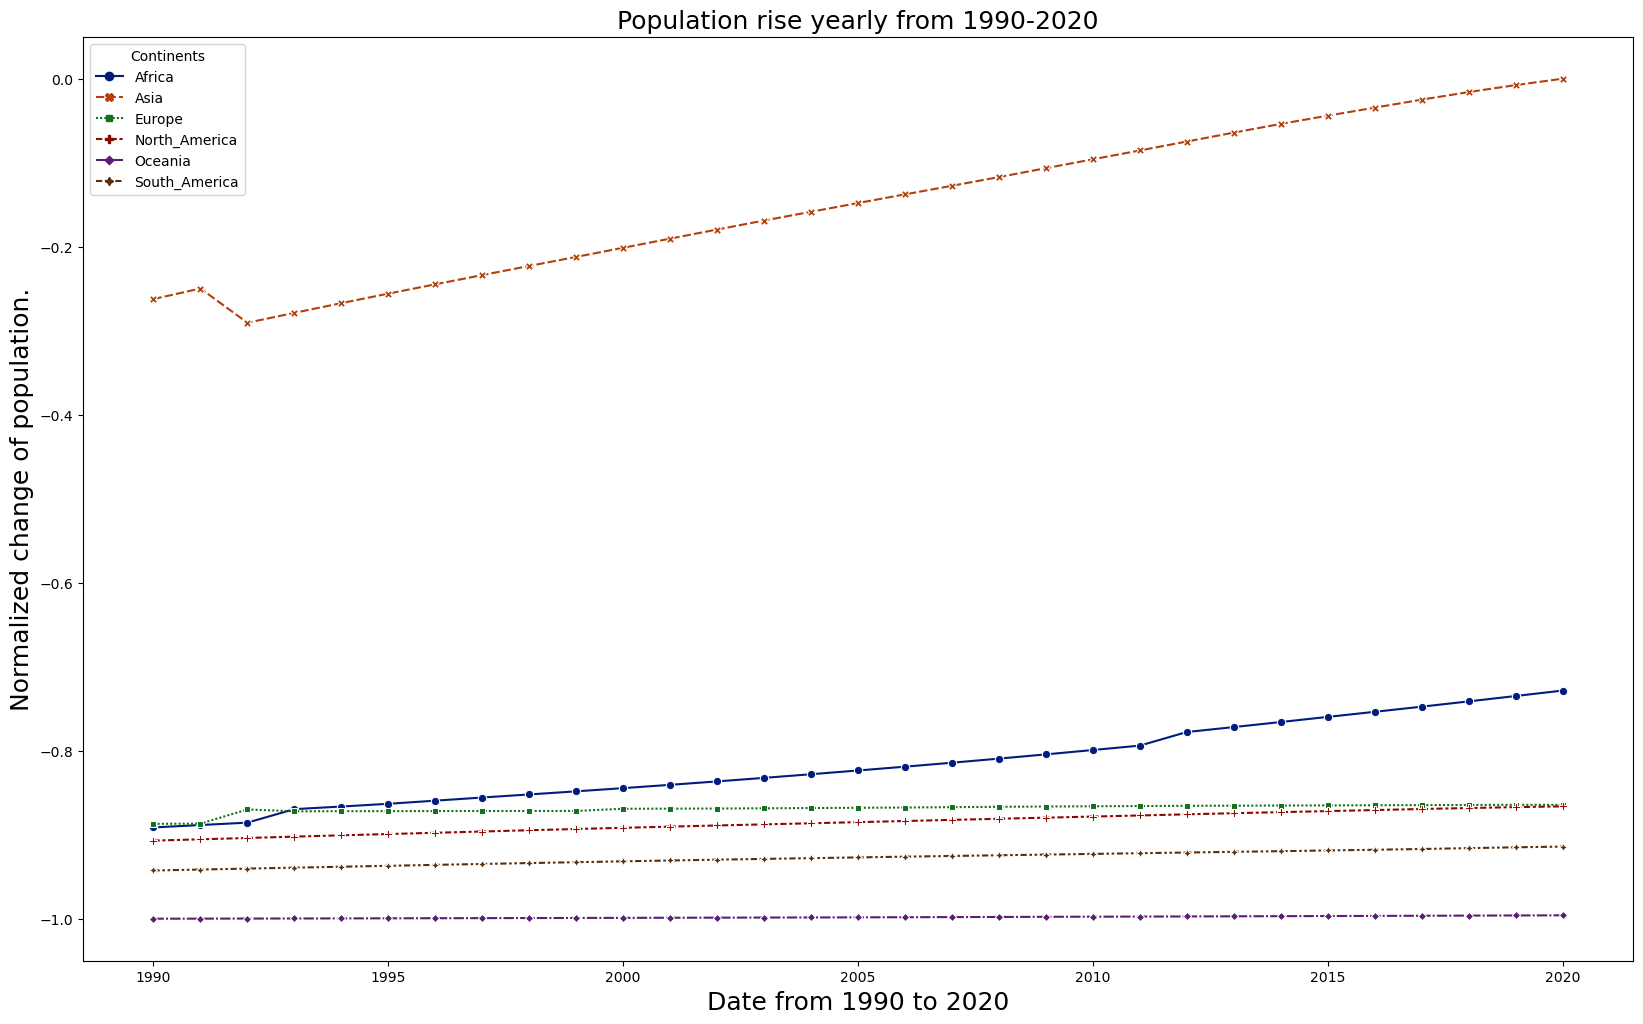

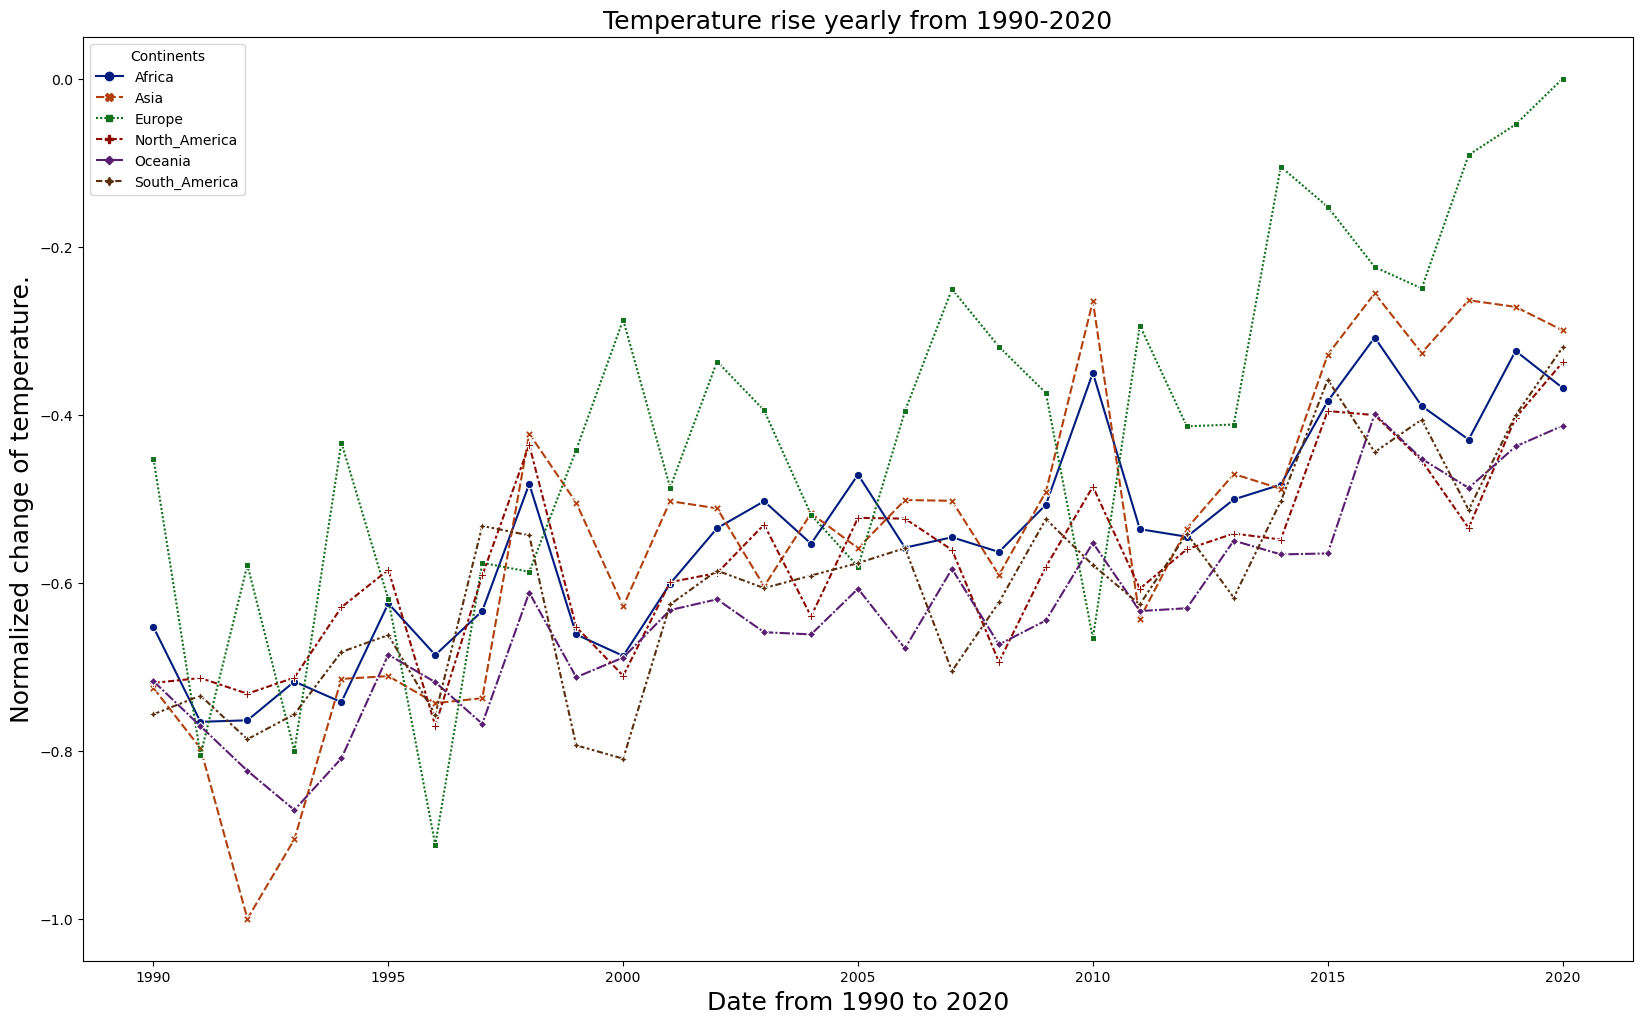

In [16]:
data_mean_tmp_emi = emission_data.groupby(['Year','Continents'])[['total_emission','Average Temperature °C']].agg('mean').reset_index()
data_sum_pop = emission_data.groupby(['Year','Continents'])[('total_population')].agg('sum').reset_index()
data_joined = pd.merge(data_mean_tmp_emi, data_sum_pop,  how='left', left_on=['Year','Continents'], right_on = ['Year','Continents'])
data_joined2 = normalize(data_joined[['total_emission','Average Temperature °C','total_population']])
data_joined2 = pd.concat((data_joined[['Year','Continents']], data_joined2[['total_emission','Average Temperature °C','total_population']]), axis = 1)

# Plot for Total Emission
plt.figure(figsize=(20, 12))
sns.lineplot(data=data_joined2, x='Year', y='total_emission', hue='Continents', palette='dark', style='Continents', markers=True)
plt.title('Total Emission rise yearly from 1990-2020', fontsize=18)
plt.xlabel('Date from 1990 to 2020', fontsize=18)
plt.ylabel('Normalized change of total-emission.', fontsize=18)
plt.show()

# Plot for Population
plt.figure(figsize=(20, 12))
sns.lineplot(data=data_joined2, x='Year', y='total_population', hue='Continents', palette='dark', style='Continents', markers=True)
plt.title('Population rise yearly from 1990-2020', fontsize=18)
plt.xlabel('Date from 1990 to 2020', fontsize=18)
plt.ylabel('Normalized change of population.', fontsize=18)
plt.show()

# Plot for Average Temperature
plt.figure(figsize=(20, 12))
sns.lineplot(data=data_joined2, x='Year', y='Average Temperature °C', hue='Continents', palette='dark', style='Continents', markers=True)
plt.title('Temperature rise yearly from 1990-2020', fontsize=18)
plt.xlabel('Date from 1990 to 2020', fontsize=18)
plt.ylabel('Normalized change of temperature.', fontsize=18)
plt.show()

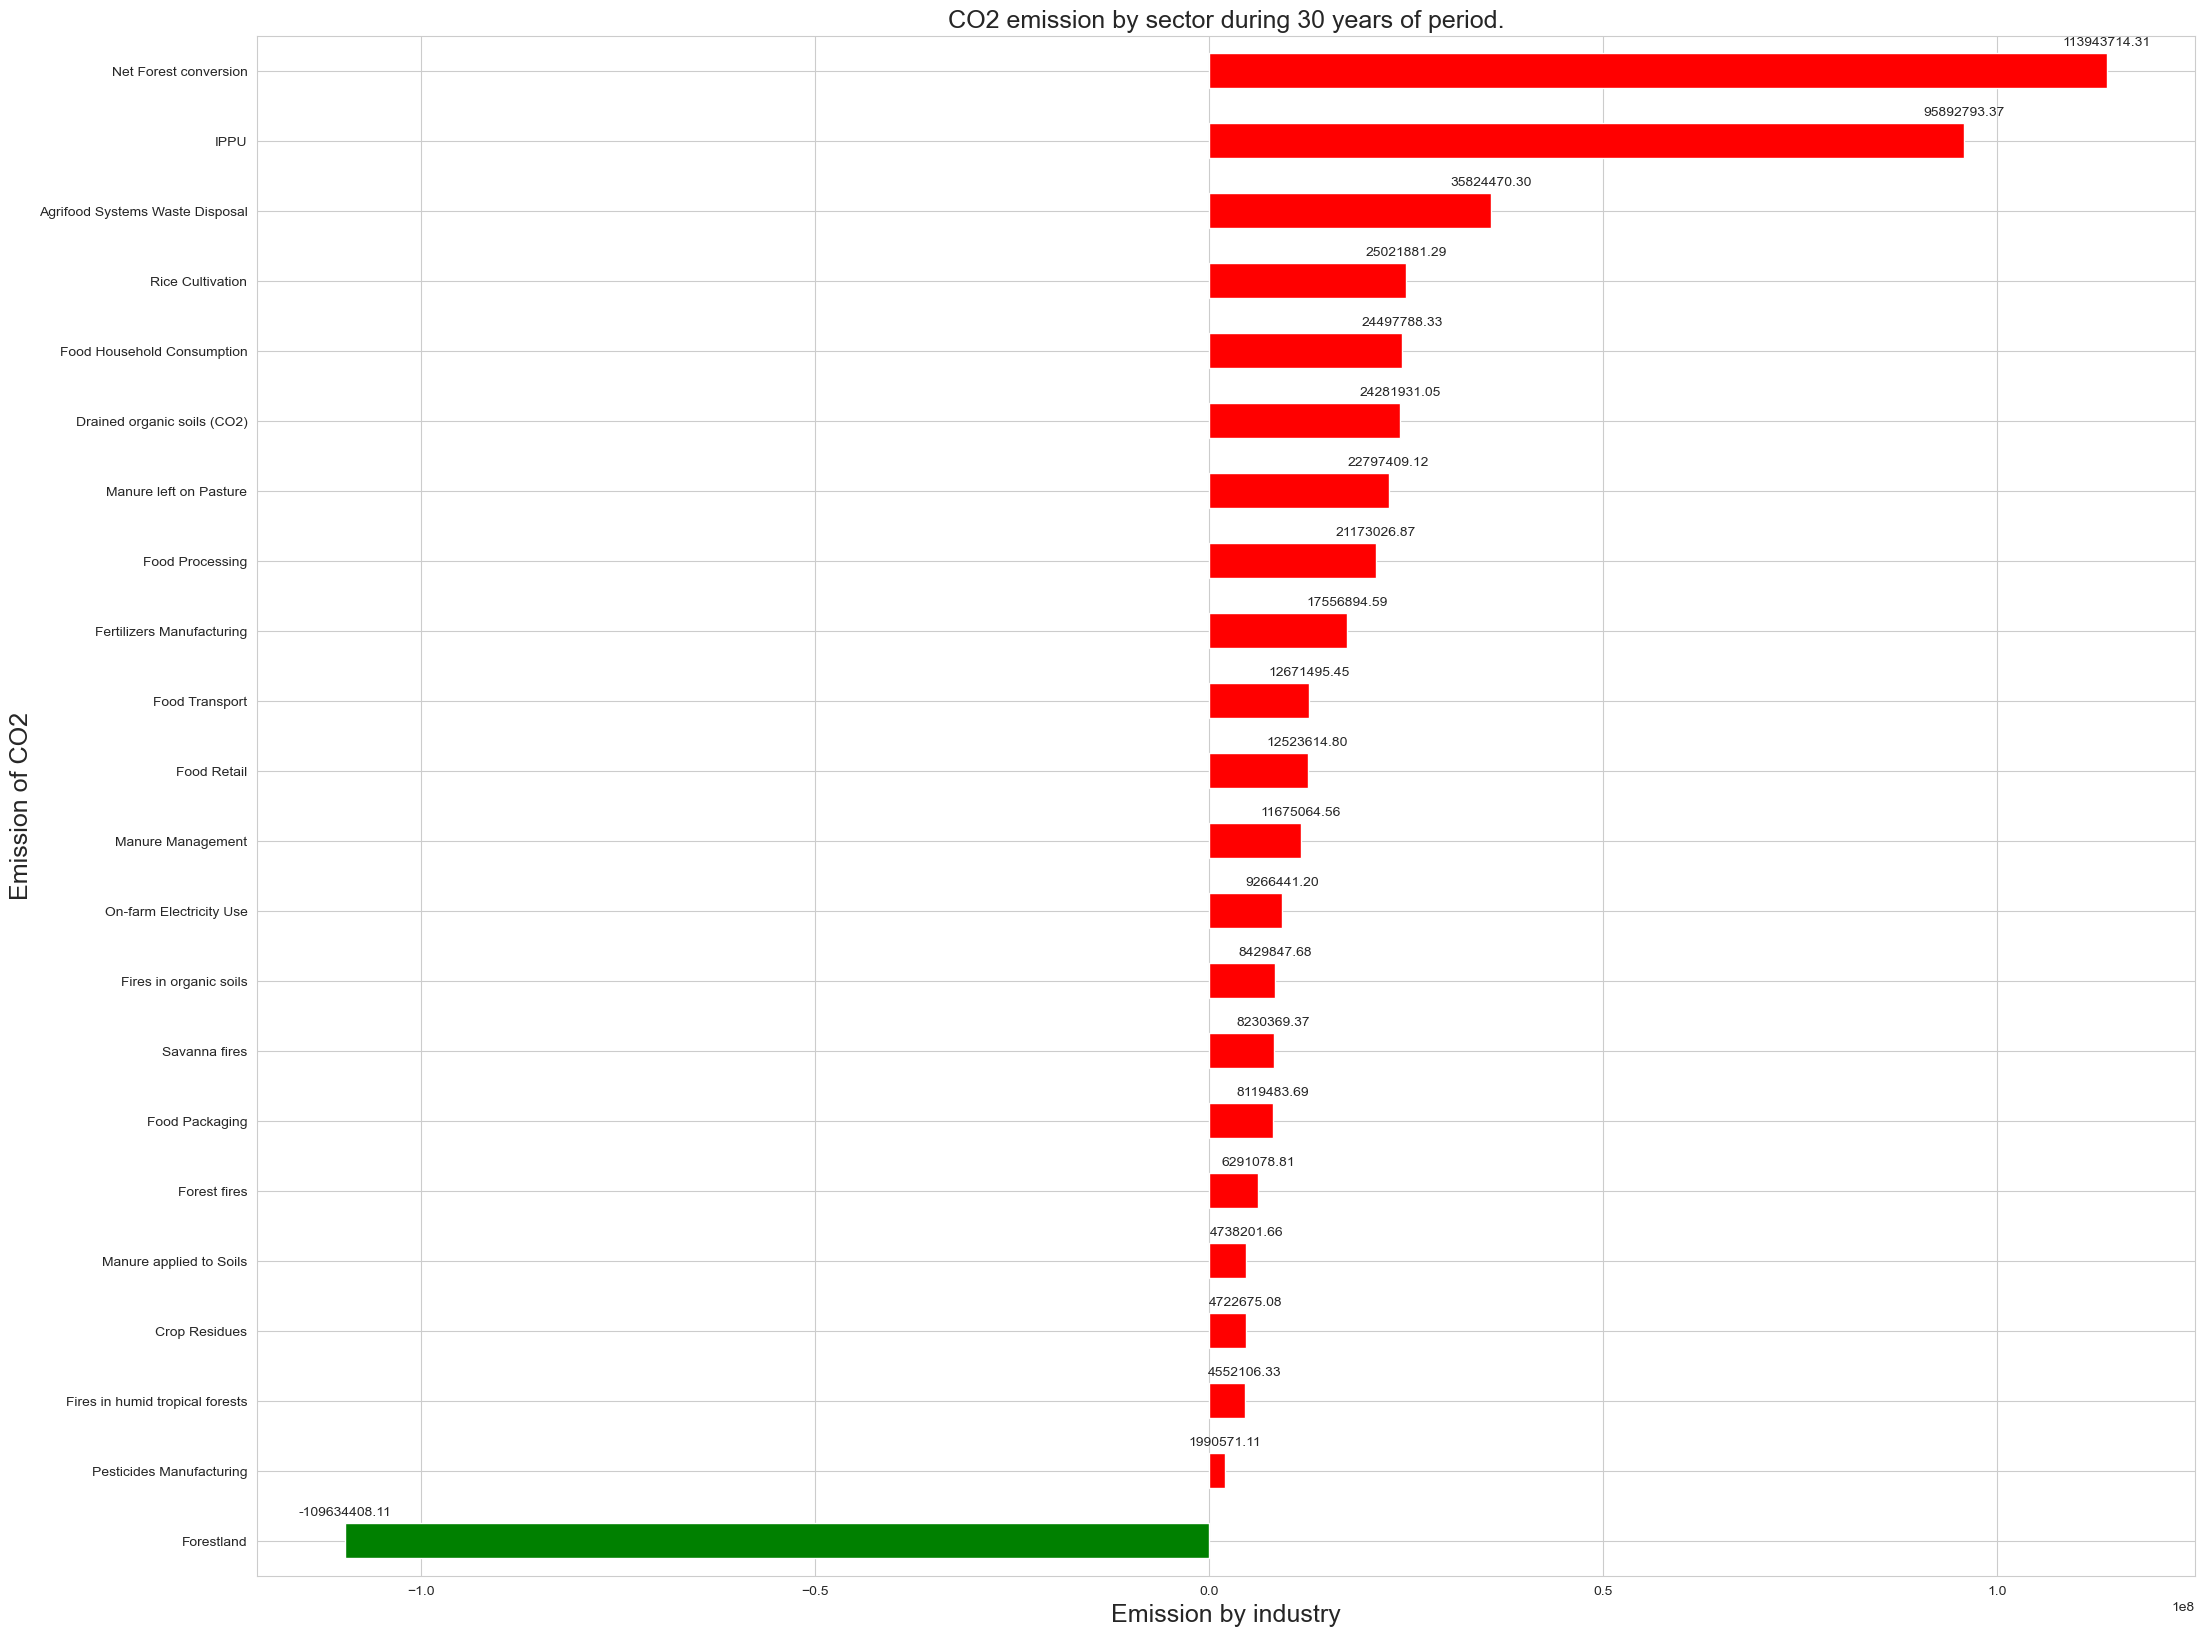

In [17]:
emission_data_emitter = emission_data.iloc[:,1:24].groupby('Year').sum()
sns.set_style('whitegrid')
emission_data_emitter_tot = emission_data_emitter.sum(axis = 0).sort_values()

colors = ['green' if (x < 0) else 'red' for x in emission_data_emitter_tot]
g = emission_data_emitter_tot.plot(kind = 'barh',
                        figsize = (25, 20),
                        color = colors,
                        rot = 0)
plt.title('CO2 emission by sector during 30 years of period.', fontsize = 18)
plt.xlabel('Emission by industry', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)

for p in g.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+ 1.3* p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.show()

Breaking down the emissions by sector over the entire dataset and aggregating the emissions for the 31-year period reveals insightful patterns. Notably, the Forestland sector exhibits a negative emission, aligning with expectations.

Analyzing the agricultural sources, it becomes evident that Net Forest Conversion stands out as the most significant contributor to CO2 emissions. Subsequent to this, emissions from industrial processes and product use rank as notable sources of carbon dioxide emissions during the period spanning 1990 to 2020.

In [18]:
emission_data_totalemi = emission_data.groupby('Area')['total_emission'].sum()
emission_data_totalemi = pd.DataFrame(emission_data_totalemi).sort_values('total_emission', ascending = False)

emission_data_top10 = emission_data_totalemi.head(10).reset_index()
emission_data_top10['Proportion_(%)'] = (emission_data_top10['total_emission'] / emission_data_top10['total_emission'].sum() )* 100
emission_data_top10

Area  total_emission  Proportion_(%)
0                   China, mainland    5.662423e+07       27.361150
1                            Brazil    3.659621e+07       17.683496
2                         Indonesia    2.821637e+07       13.634311
3          United States of America    2.319088e+07       11.205968
4                             India    1.972033e+07        9.528975
5  Democratic Republic of the Congo    1.660635e+07        8.024283
6                             Japan    6.923093e+06        3.345278
7                            Mexico    6.697904e+06        3.236466
8                           Germany    6.229363e+06        3.010064
9                            Canada    6.146473e+06        2.970011

The top 10 countries that contributed to most of the emissions. China is the leading emitter followed by Brazil where from China alone, about 10% more CO2 emission is coming than from the second most polluting country.

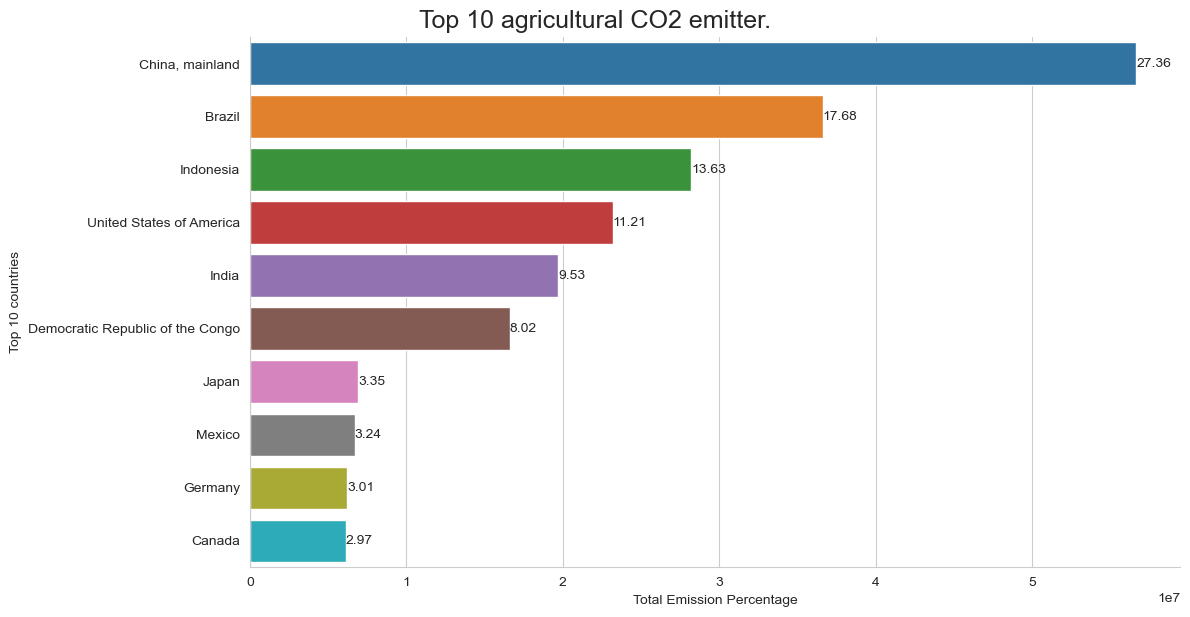

In [19]:
g = sns.catplot(x = 'total_emission',
            y = 'Area',
            data = emission_data_top10,
            kind = 'bar',
            ci = None,
            height = 6,
            aspect = 2)
g.fig.suptitle('Top 10 agricultural CO2 emitter.', y = 1.02, fontsize = 18)
g.set(xlabel = 'Total Emission Percentage',
      ylabel = 'Top 10 countries')
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=round(emission_data_top10['Proportion_(%)'], 2), label_type='edge')
plt.show()

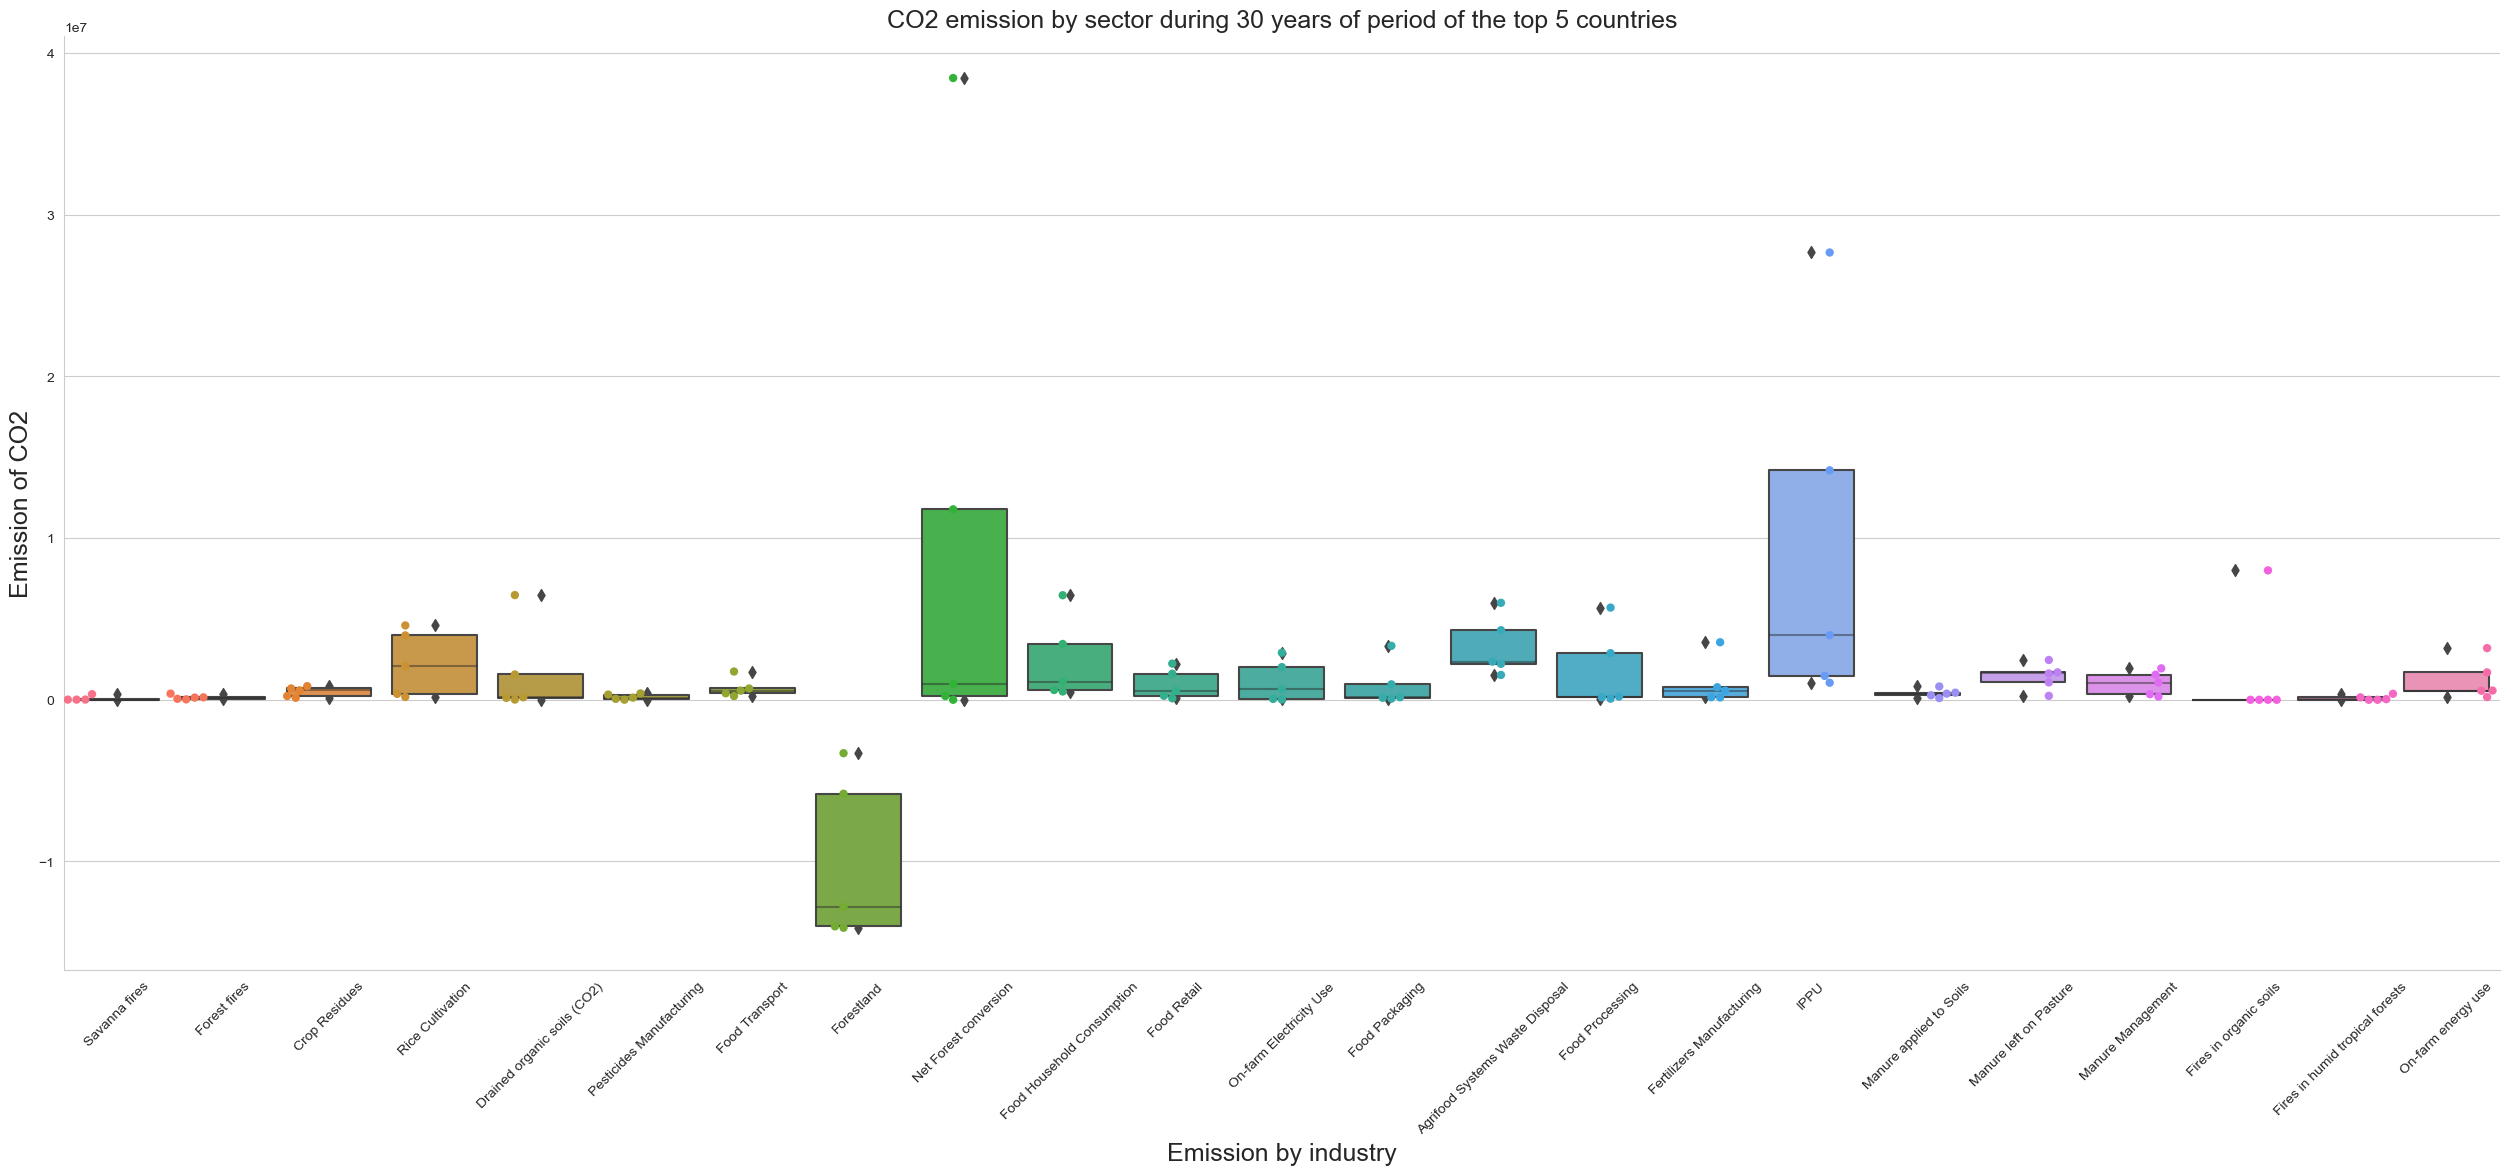

In [20]:
top5 = ['China, mainland','Brazil','Indonesia','United States of America', 'India']
emission_data_top_bool = emission_data['Area'].isin(top5)
emission_data_top5 = emission_data[emission_data_top_bool]

emission_data_top5_grp = emission_data_top5.groupby('Area')[['Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use']].sum()

emission_data_top5_grp.reset_index()
sns.catplot(data = emission_data_top5_grp,
            kind = 'boxen',
            height=10,
            aspect=2.5,
            errorbar = None)
sns.swarmplot(data = emission_data_top5_grp, size = 6, dodge = True)
plt.title('CO2 emission by sector during 30 years of period of the top 5 countries', fontsize = 18)
plt.xlabel('Emission by industry', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

In [21]:
print(emission_data.columns)

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Total Population - Male', 'Total Population - Female',
       'total_emission', 'Average Temperature °C', 'Continents',
       'World_regions', 'total_population'],
      dtype='object')


In [22]:
emission_data_bottom10 = emission_data_totalemi.tail(10).reset_index()
emission_data_bottom10['Proportion_(%)'] = (emission_data_bottom10['total_emission'] / emission_data_bottom10['total_emission'].sum() )* 100
emission_data_bottom10

Area  total_emission  Proportion_(%)
0                Georgia   -4.730578e+04        0.766362
1                 Latvia   -5.110531e+04        0.827916
2  Serbia and Montenegro   -5.933866e+04        0.961297
3               Slovenia   -6.546388e+04        1.060527
4                Finland   -9.975058e+04        1.615978
5        Solomon Islands   -1.562589e+05        2.531424
6               Bulgaria   -3.108318e+05        5.035533
7                Romania   -4.778241e+05        7.740840
8                  Chile   -5.811333e+05        9.414469
9     Russian Federation   -4.323756e+06       70.045654

The bottom 10 countries that contributed the least to the emissions. The least polluting from the agricultural sector is Russia due the forest/land area coverage followed by Chile and Romania.

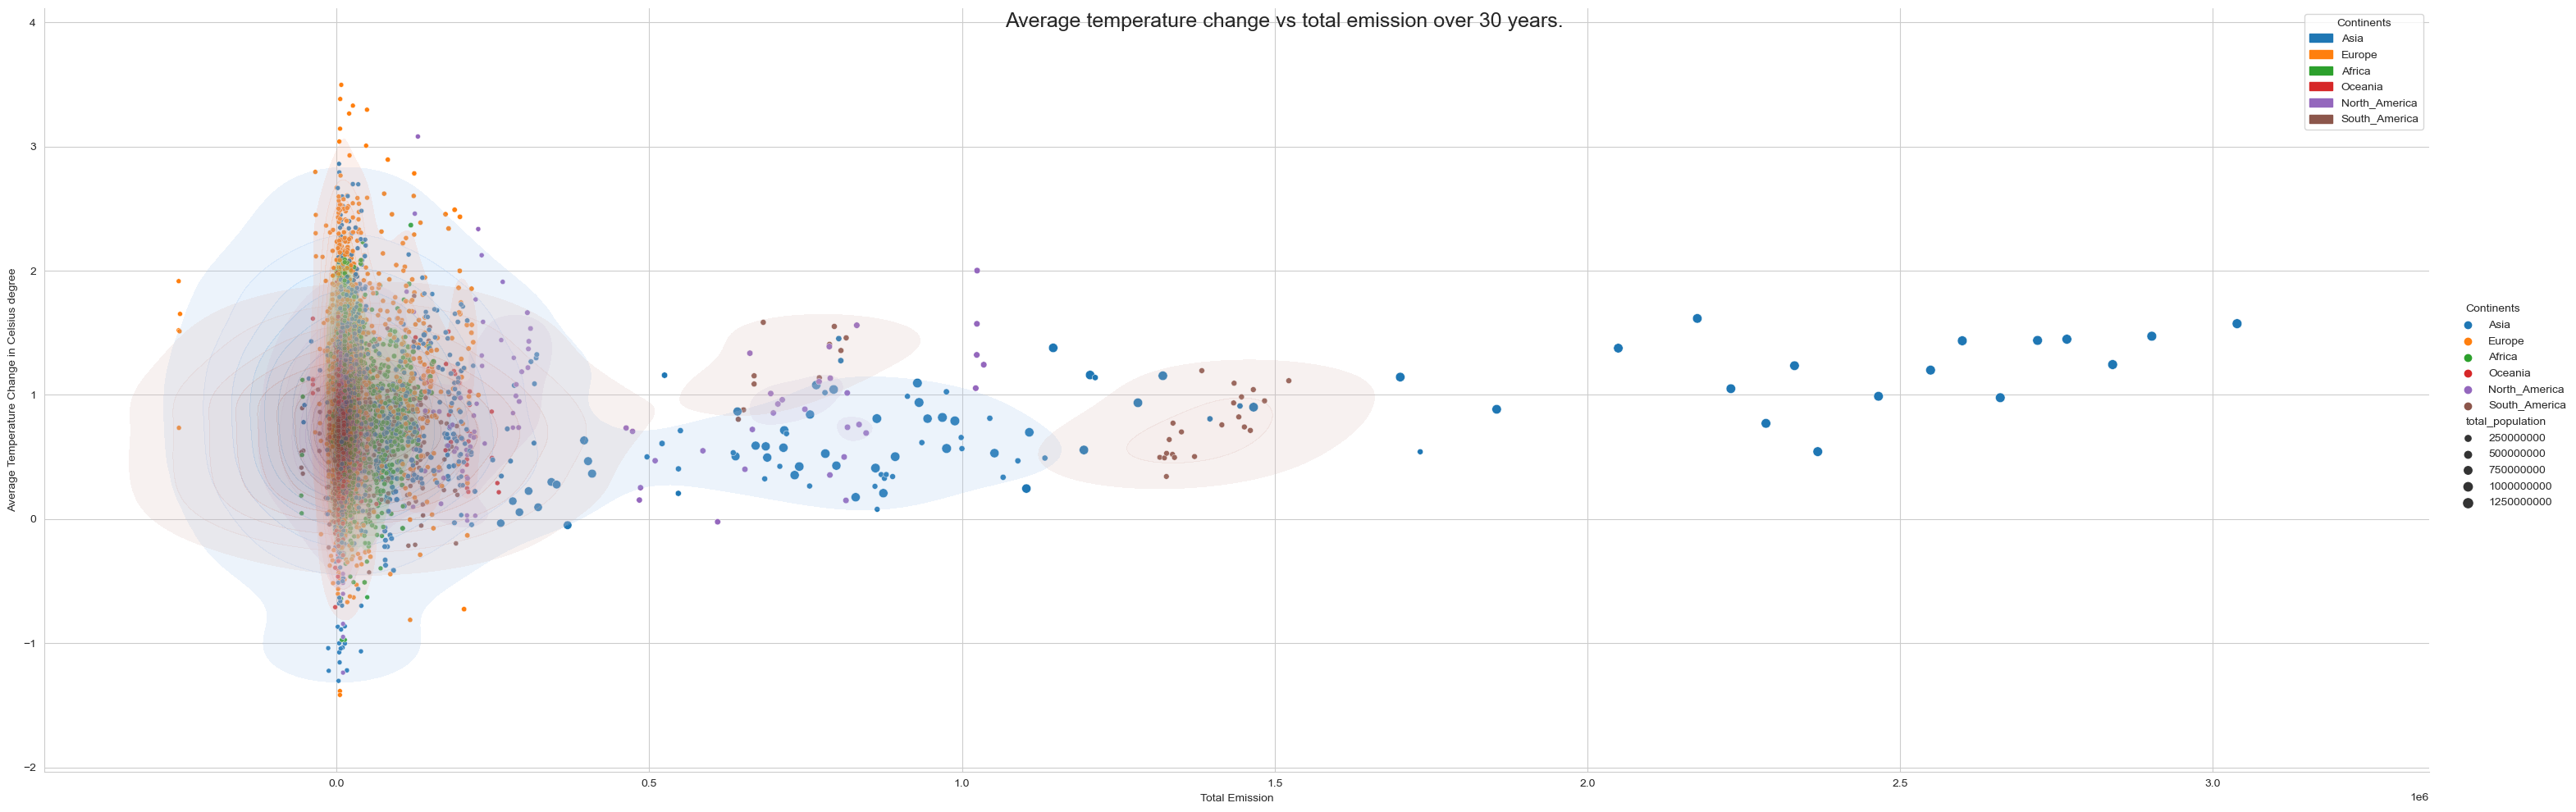

In [23]:
g = sns.relplot(x = 'total_emission',
                y = 'Average Temperature °C',
                data = emission_data,
                size = 'total_population',
                hue = 'Continents',
                height = 10,
                aspect = 3
                )
sns.kdeplot(x = 'total_emission',
            y = 'Average Temperature °C',
            data = emission_data,
            kind = 'kde',
            hue = 'Continents',
            fill = True,
            common_norm = False,
            alpha = 0.2
            )
g.fig.suptitle('Average temperature change vs total emission over 30 years.', fontsize = 18)
g.set(xlabel = 'Total Emission',
      ylabel = 'Average Temperature Change in Celsius degree')

plt.show()

## Regression Techniques

In [24]:
print(emission_data.columns)

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Total Population - Male', 'Total Population - Female',
       'total_emission', 'Average Temperature °C', 'Continents',
       'World_regions', 'total_population'],
      dtype='object')


In [25]:
new_em_data = emission_data.drop(['Area','Average Temperature °C','Continents','World_regions'],axis = 'columns')
X = new_em_data

In [26]:
y = emission_data['Average Temperature °C']
y

0       0.536167
1       0.020667
2      -0.259583
3       0.101917
4       0.372250
          ...   
6960    1.120250
6961    0.046500
6962    0.516333
6963    0.985667
6964    0.189000
Name: Average Temperature °C, Length: 6934, dtype: float64

The below code performs feature selection using the SelectKBest method from scikit-learn. It selects the top 10 features based on the F-statistic (f_classif) and transforms the original dataset 'X' accordingly. The selected feature indices and names are then obtained and used to create a new DataFrame 'selected_data' containing only the chosen features. Finally, the names of the selected features will be printed.

In [27]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Model: Ensemble Model
Mean Absolute Error: 0.2971375100812652
Mean Squared Error: 0.1584879510180147
Root Mean Squared Error: 0.39810545213299287
R2 Score: 0.4948917958243012


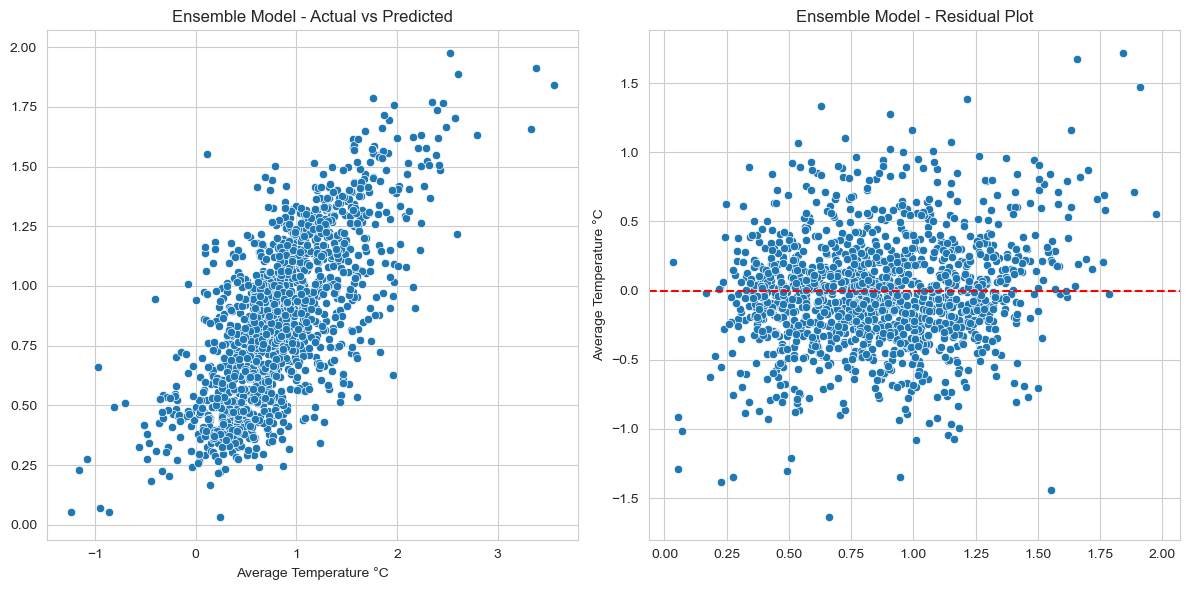

In [28]:
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor()),
    ('lasso', Lasso(alpha=0.01)),
    ('ridge', Ridge(alpha=1.0)),
    ('ada', AdaBoostRegressor()),
    ('xgb', XGBRegressor())
]

def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))

def visualize_model(y_true, y_pred, model_name):
    plt.figure(figsize=(12, 6))

    # Scatter plot for actual vs predicted values
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_true, y=y_pred)
    plt.title(f"{model_name} - Actual vs Predicted")

    # Residual plot
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_pred, y=y_true - y_pred)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f"{model_name} - Residual Plot")

    plt.tight_layout()
    plt.show()

# Create ensemble model using averaging
ensemble_model = VotingRegressor(estimators=base_models)

# Fit ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate and visualize the ensemble model
evaluate_model(y_test, y_pred_ensemble, "Ensemble Model")
visualize_model(y_test, y_pred_ensemble, "Ensemble Model")


In [29]:
from sklearn.feature_selection import SelectKBest, f_classif
selector=SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X,y)

# Get the selected feature indices
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[feature_indices]

# Create a new DataFrame with only the selected features
selected_data = new_em_data[selected_features]
# Print the selected features
print(selected_features)

Index(['Year', 'Savanna fires', 'Forest fires', 'Drained organic soils (CO2)',
       'Food Household Consumption', 'Food Retail', 'Food Packaging', 'IPPU',
       'Fires in organic soils', 'Fires in humid tropical forests'],
      dtype='object')


In below code dataset is split into training and testing sets using the train_test_split function from scikit-learn. 80% of the data is assigned to the training set ('X_train' and 'y_train'), while 20% is allocated to the testing set ('X_test' and 'y_test'). The random_state parameter ensures reproducibility of the split.

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(selected_data,y,test_size=0.2,random_state=0)

Few regression techniques that have been utilized for this dataset follows,

Linear Regression provides a baseline model assuming a linear relationship between features and the target.

Multiple Regression extends this to handle multiple predictors.

Random Forest, being an ensemble method, captures complex non-linear relationships and interactions in the data.

Lasso and Ridge Regression introduce regularization to address potential multicollinearity issues and enhance model generalization.

This diverse set of models allows for a comprehensive exploration of different facets of the data, considering both linear and non-linear patterns, as well as potential overfitting or feature selection challenges. The evaluation and visualization provide a holistic understanding of their performance and characteristics in predicting the target variable.

In [31]:
pip install xgboost


Model: Linear Regression
Mean Absolute Error: 0.35622386874974776
Mean Squared Error: 0.22215800508446473
Root Mean Squared Error: 0.4713364033092126
R2 Score: 0.2919724794806966


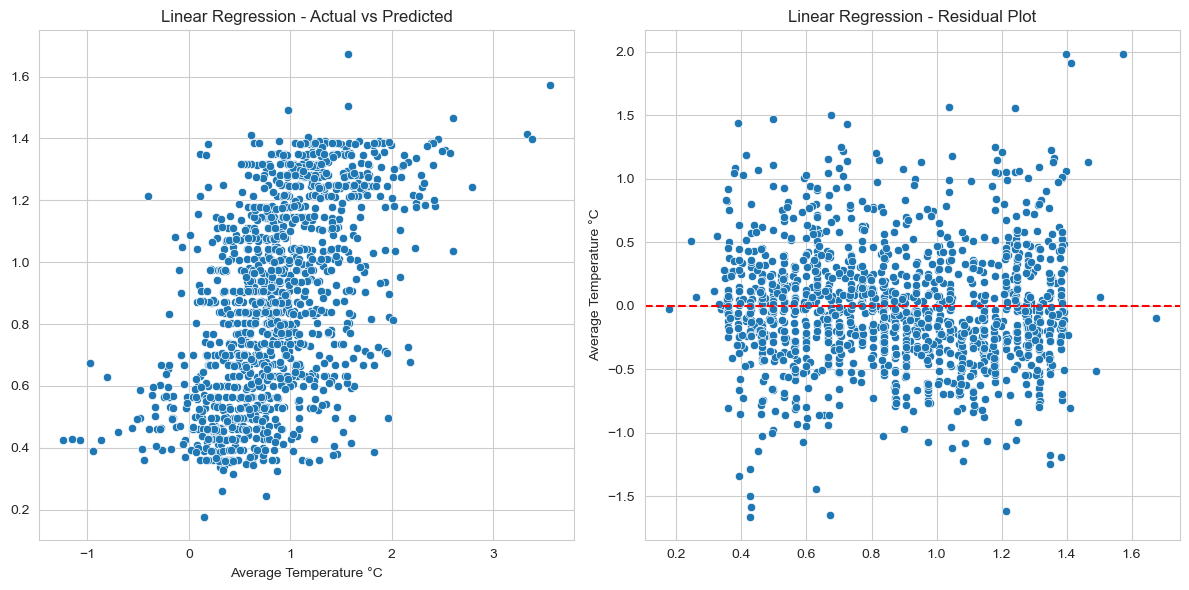


Model: Multiple Regression
Mean Absolute Error: 0.35622386874974776
Mean Squared Error: 0.22215800508446473
Root Mean Squared Error: 0.4713364033092126
R2 Score: 0.2919724794806966


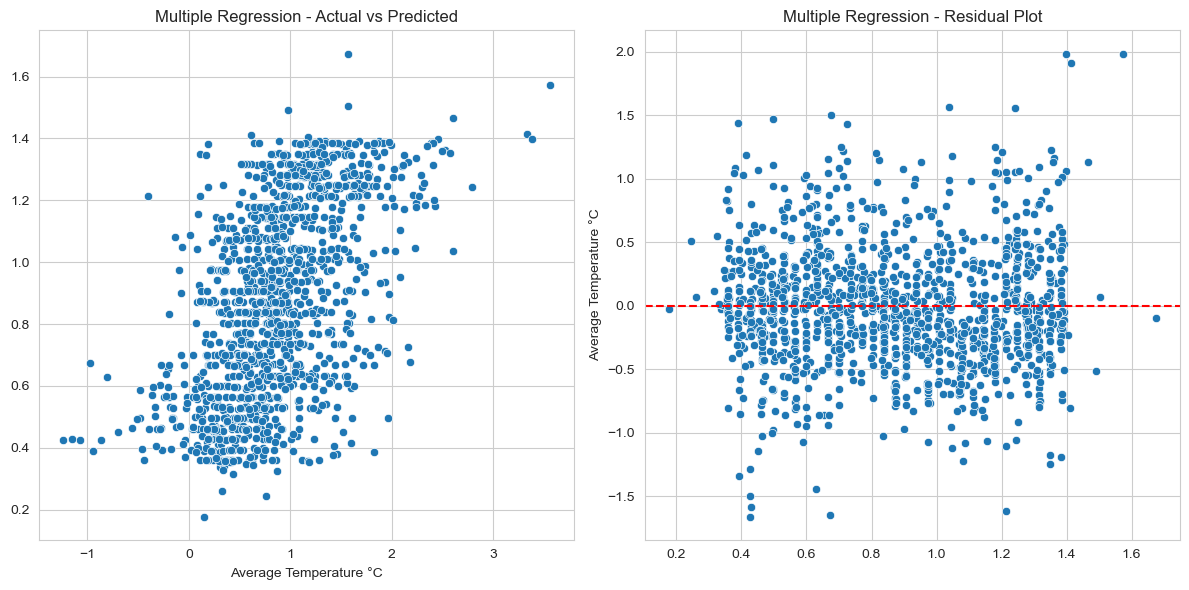


Model: Random Forest
Mean Absolute Error: 0.26692978546032786
Mean Squared Error: 0.129206213584821
Root Mean Squared Error: 0.35945265833600537
R2 Score: 0.5882140055886487


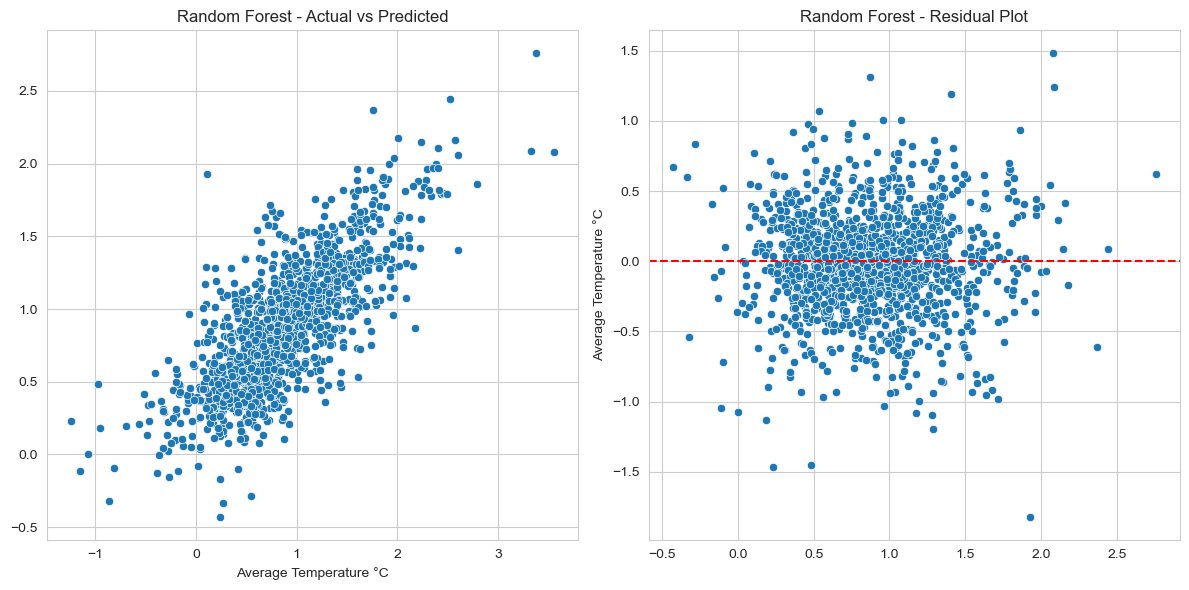


Model: Lasso Regression
Mean Absolute Error: 0.3565066627570071
Mean Squared Error: 0.22366679906901402
Root Mean Squared Error: 0.4729342439166507
R2 Score: 0.28716388541968707


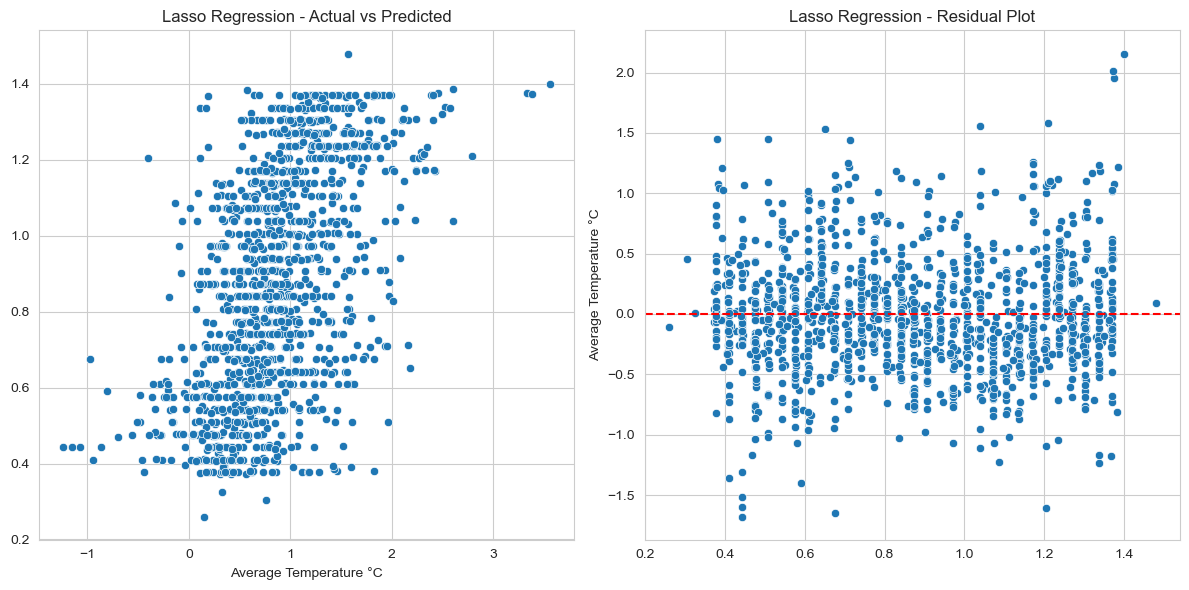


Model: Ridge Regressiont
Mean Absolute Error: 0.3562165762941653
Mean Squared Error: 0.2221589037016697
Root Mean Squared Error: 0.47133735657347353
R2 Score: 0.29196961554738354


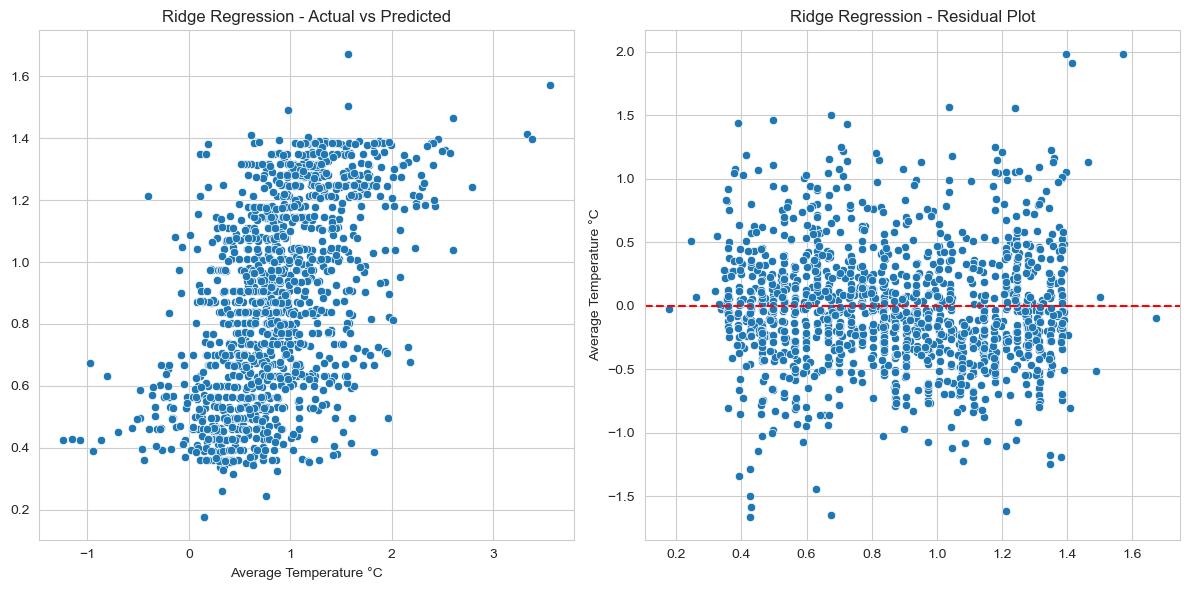


Model: AdaBoost
Mean Absolute Error: 0.34700732982233223
Mean Squared Error: 0.206581100276961
Root Mean Squared Error: 0.4545119363415674
R2 Score: 0.3416167733427561


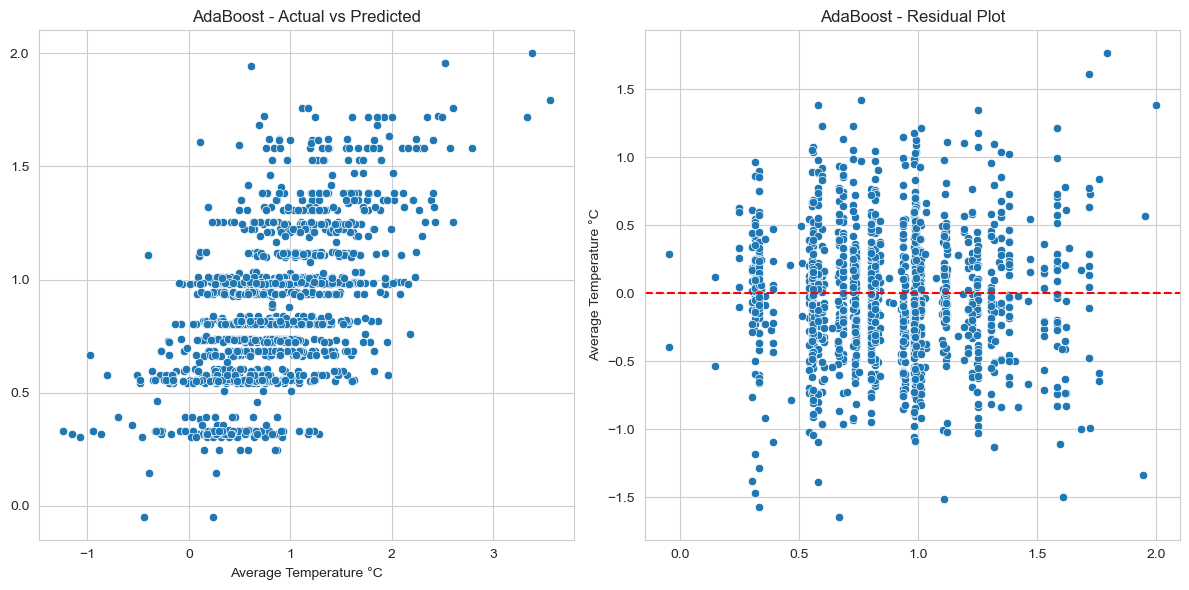


Model: XGBoost
Mean Absolute Error: 0.26375797798215295
Mean Squared Error: 0.12665822047542066
Root Mean Squared Error: 0.3558907423289073
R2 Score: 0.5963345738430453


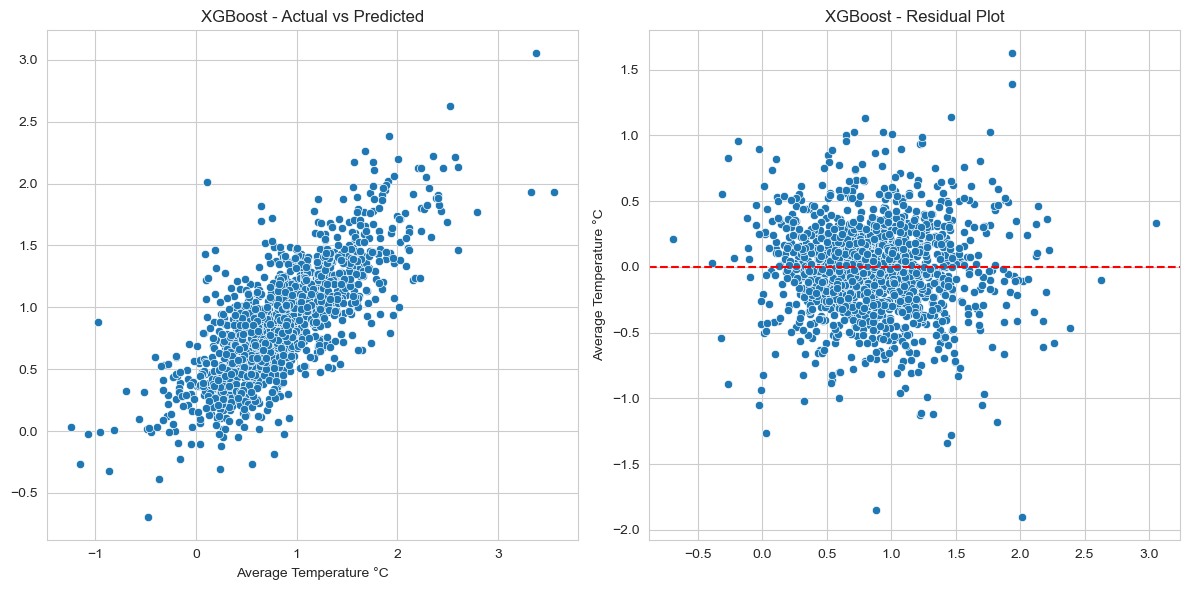

In [32]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Multiple Regression
multiple_regression_model = LinearRegression()
multiple_regression_model.fit(X_train_scaled, y_train)
y_pred_multiple = multiple_regression_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# AdaBoost
ada_model = AdaBoostRegressor()
ada_model.fit(X_train_scaled, y_train)
y_pred_ada = ada_model.predict(X_test_scaled)

# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))

# Visualize the models
def visualize_model(y_true, y_pred, model_name):
    plt.figure(figsize=(12, 6))

    # Scatter plot for actual vs predicted values
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_true, y=y_pred)
    plt.title(f"{model_name} - Actual vs Predicted")

    # Residual plot
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_pred, y=y_true - y_pred)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f"{model_name} - Residual Plot")

    plt.tight_layout()
    plt.show()

# Evaluate and visualize the Linear Regression model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
visualize_model(y_test, y_pred_lr, "Linear Regression")

# Evaluate and visualize the Multiple Regression model
evaluate_model(y_test, y_pred_multiple, "Multiple Regression")
visualize_model(y_test, y_pred_multiple, "Multiple Regression")

# Evaluate and visualize the Random Forest model
evaluate_model(y_test, y_pred_rf, "Random Forest")
visualize_model(y_test, y_pred_rf, "Random Forest")

# Evaluate and visualize the Lasso model
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
visualize_model(y_test, y_pred_lasso, "Lasso Regression")

# Evaluate and visualize the Ridge model
evaluate_model(y_test, y_pred_ridge, "Ridge Regressiont")
visualize_model(y_test, y_pred_ridge, "Ridge Regression")

# Evaluate and visualize the AdaBoost model
evaluate_model(y_test, y_pred_ada, "AdaBoost")
visualize_model(y_test, y_pred_ada, "AdaBoost")

# Evaluate and visualize the XGBoost model
evaluate_model(y_test, y_pred_xgb, "XGBoost")
visualize_model(y_test, y_pred_xgb, "XGBoost")

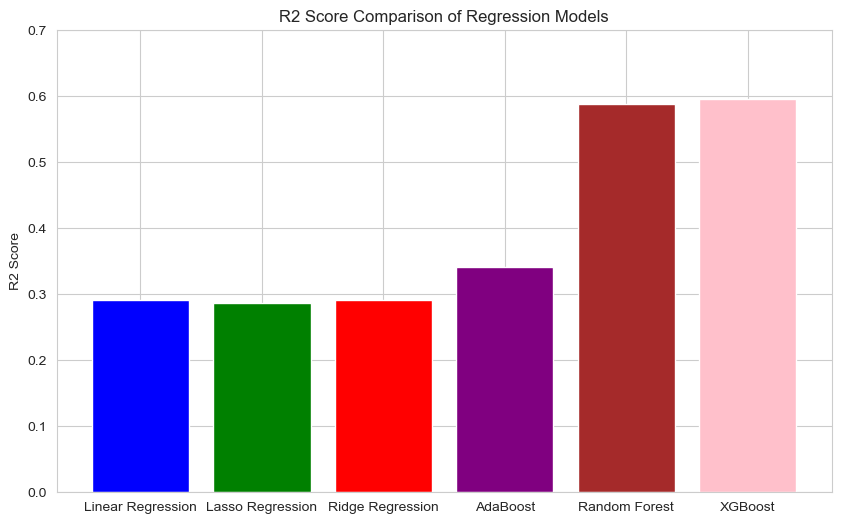

In [33]:
# R2 scores for each model
r2_scores = {
    "Linear Regression": r2_score(y_test, y_pred_lr),
    "Lasso Regression": r2_score(y_test, y_pred_lasso),
    "Ridge Regression": r2_score(y_test, y_pred_ridge),
    "AdaBoost": r2_score(y_test, y_pred_ada),
    "Random Forest": r2_score(y_test, y_pred_rf),
    "XGBoost": r2_score(y_test, y_pred_xgb),
}

# Plot the R2 scores
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'green', 'red', 'purple', 'brown', 'pink'])
plt.title('R2 Score Comparison of Regression Models')
plt.ylabel('R2 Score')
plt.ylim([0, 0.7])
plt.show()

In [34]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('lr1', LinearRegression() ),
    ('rf', RandomForestRegressor()),
    ('xgb', XGBRegressor())
]

stacked_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stacked_model.fit(X_train, y_train)
y_pred_stacked = stacked_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred_stacked = stacked_model.predict(X_test)

# Evaluate the model
mae_stacked = mean_absolute_error(y_test, y_pred_stacked)
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
rmse_stacked = np.sqrt(mse_stacked)
r2_stacked = r2_score(y_test, y_pred_stacked)

print("Stacked Model:")
print("Mean Absolute Error:", mae_stacked)
print("Mean Squared Error:", mse_stacked)
print("Root Mean Squared Error:", rmse_stacked)
print("R2 Score:", r2_stacked)

Stacked Model:
Mean Absolute Error: 0.25711537604993
Mean Squared Error: 0.1205834554076436
Root Mean Squared Error: 0.34725128568177194
R2 Score: 0.6156951224176519


The metrics provide an evaluation of the model performances. The lower values of Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for Random Forest indicate better accuracy and lower prediction errors compared to Linear, Multiple, Ridge, Lasso Regression models. The R2 Score, measuring the proportion of variance explained, is higher for Random Forest, suggesting its superior ability to capture the variability in the target variable. These results indicate that Random Forest outperforms the linear models in predicting the target variable in this dataset, likely due to its capacity to capture non-linear relationship.

Experimenting with more sophisticated regression models, such as Gradient Boosting or Neural Networks, to further enhance predictive capabilities may be lead to more better performance.

## Emissions by region

World_regions     Continents  total_emission
0               Eastern Europe           Asia    1.044955e+06
1                    Melanesia        Oceania    1.148229e+06
2                    Polynesia        Oceania    1.302897e+06
3                   Micronesia        Oceania    1.364544e+06
4                 Central Asia           Asia    2.625027e+06
5              Central America  North_America    3.409985e+06
6                    Caribbean  North_America    4.354880e+06
7              Southern Africa         Africa    5.542095e+06
8               Eastern Europe         Europe    5.846630e+06
9   Australia And New Zealand         Oceania    6.317674e+06
10             Northern Africa         Africa    6.362612e+06
11                Western Asia           Asia    7.601168e+06
12             Northern Europe         Europe    7.884556e+06
13              Western Africa         Africa    8.588273e+06
14               Middle Africa         Africa    8.901046e+06
15             Southern Europe         Europe    1.069584e+07
16              Eastern Africa         Africa    1.335790e+07
17              Western Europe         Europe    1.397060e+07
18              Southeast Asia           Asia    1.757914e+07
19                  South Asia           Asia    2.714353e+07
20                   Melanesia           Asia    2.821637e+07
21               North America  North_America    3.667396e+07
22               South America  South_America    5.223684e+07
23                   East Asia           Asia    6.508146e+07

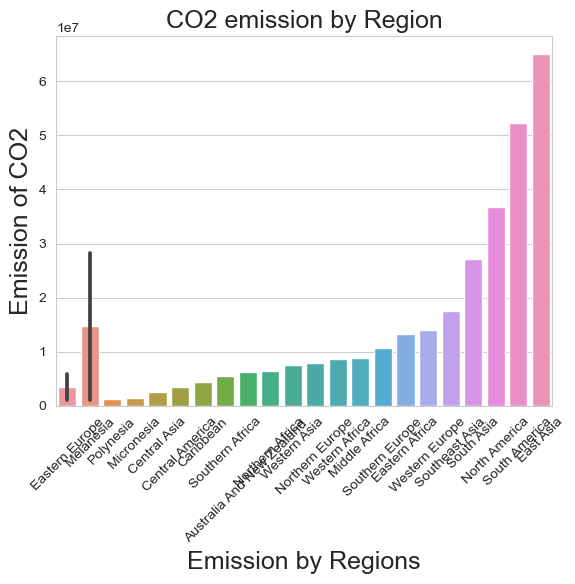

In [35]:
summed_emission = emission_data.groupby(['World_regions','Continents'])[('total_emission')].agg('sum').sort_values().reset_index()

sns.barplot(data = summed_emission, x = 'World_regions', y = 'total_emission')
plt.title('CO2 emission by Region', fontsize = 18)
plt.xlabel('Emission by Regions', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)
plt.xticks(rotation = 45)
summed_emission

## Emissions per capita

In [36]:
emission_data_emiPerCapita = emission_data[['Area', 'Year', 'Forestland', 'total_emission', 'total_population','Continents','World_regions']]
emission_data_emiPerCapita['Emission_Per_Capita'] = emission_data_emiPerCapita['total_emission'] / emission_data_emiPerCapita['total_population']
emission_data = pd.concat([emission_data, emission_data_emiPerCapita['Emission_Per_Capita']], axis = 1)
emission_data_emiPerCapita_mean = emission_data_emiPerCapita.groupby('Area')['Emission_Per_Capita'].mean()
emission_data_emiPerCapita_mean.sort_values(ascending = False).head(n=10).reset_index()

Area  Emission_Per_Capita
0                                      Holy See            30.512951
1                                       Tokelau             4.707367
2                   Falkland Islands (Malvinas)             4.611468
3  Saint Helena, Ascension and Tristan da Cunha             1.981689
4                     Saint Pierre and Miquelon             1.659791
5                                          Niue             1.614958
6                                    Montserrat             1.593782
7                                      Anguilla             1.065676
8                     Wallis and Futuna Islands             0.824501
9                        British Virgin Islands             0.677127

## Predictions for CO2 emission

In [37]:
print(emission_data.columns)

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Total Population - Male', 'Total Population - Female',
       'total_emission', 'Average Temperature °C', 'Continents',
       'World_regions', 'total_population', 'Emission_Per_Capita'],
      dtype='object')


In [38]:
emission_data_tsa = emission_data.groupby(['Year', 'Continents'])[['Average Temperature °C','total_emission','Emission_Per_Capita']]\
                      .agg({'Average Temperature °C':'mean','total_emission':'sum','Emission_Per_Capita':'mean'}, axis = 1)\
                      .sort_values(by = 'Year').reset_index()
emission_data_tsa_temp = emission_data_tsa[['Year', 'Continents','Average Temperature °C']]
emission_data_tsa_temp = emission_data_tsa_temp.pivot(index = 'Year', columns = 'Continents', values = 'Average Temperature °C')
emission_data_tsa_temp

Continents    Africa      Asia    Europe  North_America   Oceania  \
Year                                                                
1990        0.583124  0.412336  1.056679       0.426595  0.431277   
1991        0.317352  0.243006  0.223503       0.440305  0.305089   
1992        0.321508 -0.235640  0.757954       0.396264  0.179775   
1993        0.430414 -0.012456  0.235694       0.441456  0.069761   
1994        0.372567  0.437915  1.101435       0.638941  0.214639   
1995        0.649755  0.445579  0.660948       0.744207  0.505987   
1996        0.505020  0.369709 -0.028276       0.306256  0.428466   
1997        0.628538  0.383710  0.763831       0.728545  0.311848   
1998        0.985427  1.126581  0.738625       1.095067  0.680298   
1999        0.562753  0.932564  1.080653       0.583662  0.442585   
2000        0.502408  0.641314  1.446348       0.446692  0.497808   
2001        0.705508  0.936938  0.975133       0.709565  0.631198   
2002        0.861128  0.916871  1.329070       0.735168  0.661366   
2003        0.936767  0.697662  1.192009       0.871172  0.568938   
2004        0.817499  0.902703  0.898682       0.613394  0.562782   
2005        1.011559  0.804989  0.752818       0.890056  0.691170   
2006        0.806343  0.940129  1.190087       0.887928  0.523376   
2007        0.835573  0.937965  1.532443       0.800126  0.746805   
2008        0.794256  0.729429  1.370654       0.485611  0.534509   
2009        0.927043  0.963267  1.240733       0.752614  0.601985   
2010        1.297547  1.498746  0.552237       0.977829  0.819790   
2011        0.858303  0.607189  1.430131       0.691317  0.628257   
2012        0.837080  0.860163  1.147219       0.801952  0.636372   
2013        0.941841  1.013275  1.152222       0.846123  0.826093   
2014        0.983380  0.971606  1.876294       0.829234  0.787446   
2015        1.217604  1.348522  1.763354       1.190101  0.790193   
2016        1.396551  1.520549  1.594531       1.178673  1.182053   
2017        1.204405  1.353201  1.534415       1.051088  1.055946   
2018        1.109857  1.501054  1.909313       0.861495  0.974074   
2019        1.358906  1.482555  1.994793       1.171409  1.090547   
2020        1.255033  1.416726  2.123269       1.326800  1.148637   

Continents  South_America  
Year                       
1990             0.338475  
1991             0.390800  
1992             0.268260  
1993             0.338667  
1994             0.513367  
1995             0.560992  
1996             0.337442  
1997             0.867467  
1998             0.840875  
1999             0.251400  
2000             0.213742  
2001             0.646950  
2002             0.742025  
2003             0.692750  
2004             0.728092  
2005             0.763092  
2006             0.805133  
2007             0.459792  
2008             0.652783  
2009             0.886758  
2010             0.757592  
2011             0.646975  
2012             0.845883  
2013             0.666125  
2014             0.936125  
2015             1.278217  
2016             1.074667  
2017             1.166017  
2018             0.912650  
2019             1.178325  
2020             1.368492

## Prediction for Europe

Based on the available data, we try to predict the next few years of temperature change. However the dataset only contains the agricultural emissions
and the temperature change is possible due to the global emission from all sources, it's most likely going to be off from reality.

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

The p-value for the ADF test is  0.17786535164333178


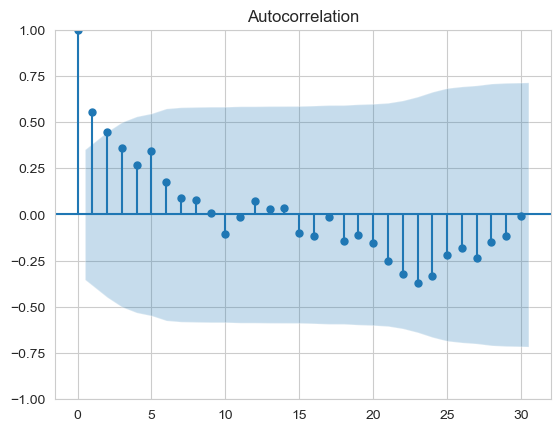

In [40]:
emission_data_tsa_temp.index = pd.to_datetime(emission_data_tsa_temp.index, format = '%Y')
result = adfuller(emission_data_tsa_temp['Europe'])
print("The p-value for the ADF test is ", result[1])

# Plot the ACF
plot_acf(emission_data_tsa_temp['Europe'], lags=30)
plt.show()

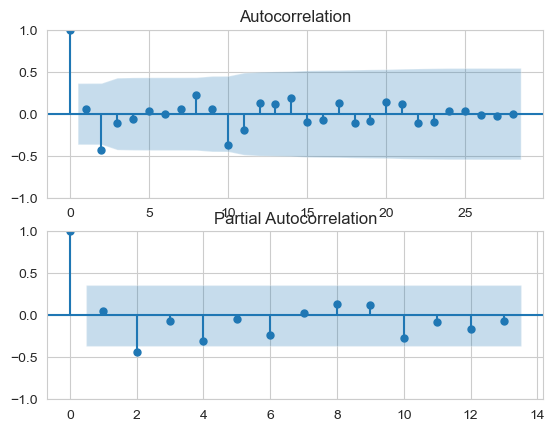

In [ ]:
# Taking the first difference of Europe to make it stationary
#Differencing transforms a non-stationary series into a stationary one by subtracting the current value from a previous value.
emission_data_tsa_europe_chg = emission_data_tsa_temp['Europe'].diff(2) #The diff(2) means subtracting the value 2 lags back.
emission_data_tsa_europe_chg = emission_data_tsa_europe_chg.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# By Plotting the ACF, Shows how the series correlates with its past values (lags)
plot_acf(emission_data_tsa_europe_chg, lags=28, ax=axes[0])

# Plot the PACF
plot_pacf(emission_data_tsa_europe_chg, lags=13, ax=axes[1])
plt.show()

In [42]:
def fitARIMAModel(emission_data, order):
    mod = ARIMA(emission_data, order = order)
    res = mod.fit()
    print('The AIC for order: ',order, 'is: ', res.aic)

def bestAICScore(emission_data, p_values,d_values,q_values):
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    fitARIMAModel(emission_data, order)
                except:
                    continue

p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 2)

bestAICScore(emission_data_tsa_europe_chg, p_values, d_values, q_values)

c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

The AIC for order:  (0, 0, 0) is:  42.37850791506251
The AIC for order:  (0, 0, 1) is:  43.92729507210852
The AIC for order:  (0, 1, 0) is:  57.54404719157016
The AIC for order:  (0, 1, 1) is:  45.4049804223587


c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

The AIC for order:  (1, 0, 0) is:  44.29971586885602
The AIC for order:  (1, 0, 1) is:  41.19317463986176


c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

The AIC for order:  (1, 1, 0) is:  57.9341912762892
The AIC for order:  (1, 1, 1) is:  47.18841442386743
The AIC for order:  (2, 0, 0) is:  40.22962298049588


c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferre

The AIC for order:  (2, 0, 1) is:  37.90543999288604
The AIC for order:  (2, 1, 0) is:  51.78449591081101
The AIC for order:  (2, 1, 1) is:  44.02473050371482


c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


The AIC for order:  (3, 0, 0) is:  42.052348907903536


c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferre

The AIC for order:  (3, 0, 1) is:  39.43063222090126
The AIC for order:  (3, 1, 0) is:  52.818966032137496
The AIC for order:  (3, 1, 1) is:  45.97110011388013


c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


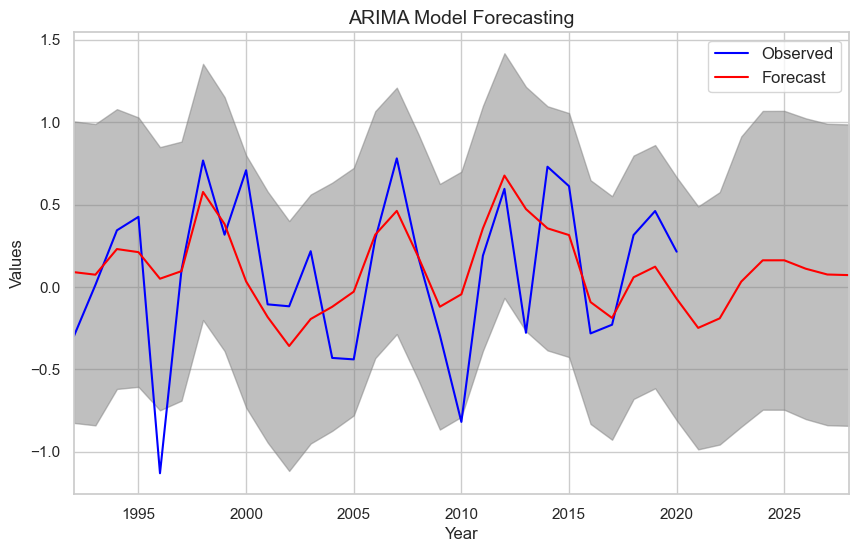

In [51]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Define and fit the ARIMA model
mod = ARIMA(emission_data_tsa_europe_chg, order=(2, 0, 1))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots(figsize=(10, 6))
emission_data_tsa_europe_chg.plot(ax=ax, color='blue', label='Observed')
plot_predict(res, start='1992', end='2028', ax=ax, plot_insample=False, dynamic=False)

# Changing the forecast color to red
lines = ax.get_lines()
lines[1].set_color('red')  # The forecast line is usually the second line

ax.set_title('ARIMA Model Forecasting', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.legend(['Observed', 'Forecast'], fontsize=12)
plt.show()


## Prediction for Asia

We make the same assumtion for Asia about the dataset

The p-value for the ADF test is  0.5780367084551749


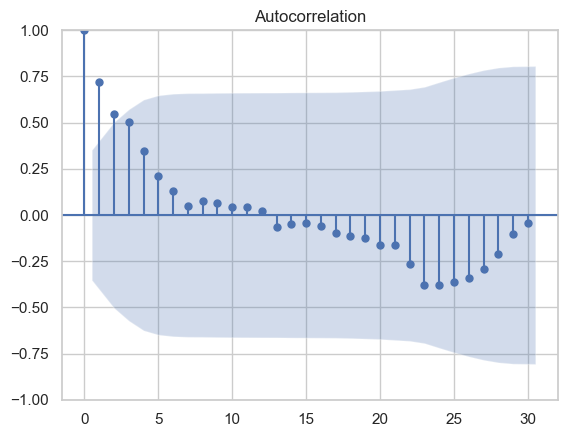

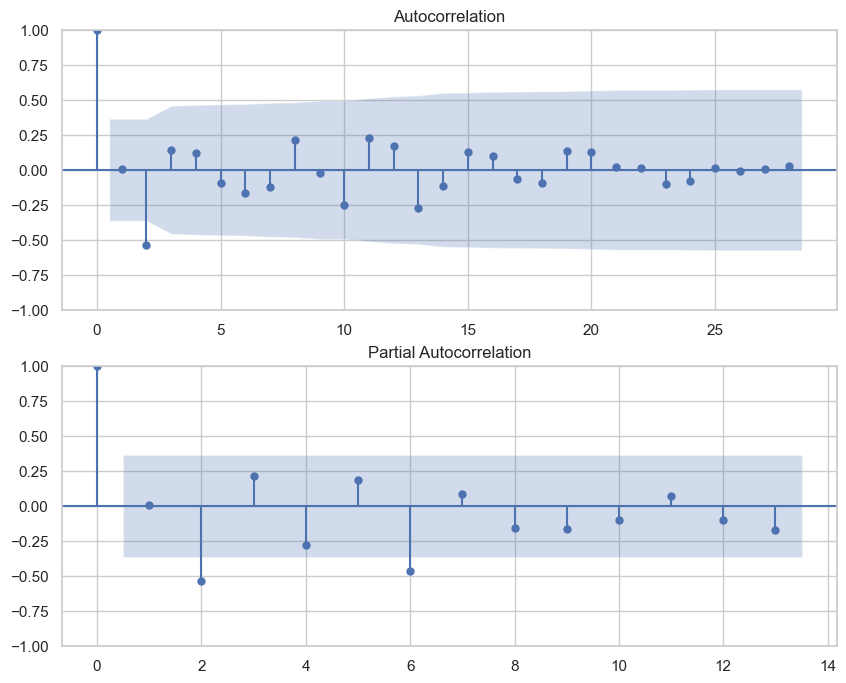

c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

The AIC for order: (0, 0, 0) is: 29.165249608548997
The AIC for order: (0, 0, 1) is: 23.233300512526323
The AIC for order: (0, 1, 0) is: 44.55213969358377


c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

The AIC for order: (0, 1, 1) is: 32.647441696516864
The AIC for order: (1, 0, 0) is: 31.164382700704046
The AIC for order: (1, 0, 1) is: 22.75927572826555


c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

The AIC for order: (1, 1, 0) is: 45.40165694483964
The AIC for order: (1, 1, 1) is: 34.59653939980561
The AIC for order: (2, 0, 0) is: 21.576801284067066


c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


The AIC for order: (2, 0, 1) is: 13.51284185110351
The AIC for order: (2, 1, 0) is: 28.88012002380412
The AIC for order: (2, 1, 1) is: 26.405531118719733


c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

The AIC for order: (3, 0, 0) is: 22.435796486173807


c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferre

The AIC for order: (3, 0, 1) is: 15.50654211720724
The AIC for order: (3, 1, 0) is: 30.68491910007562
The AIC for order: (3, 1, 1) is: 26.813041964173305


c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\saida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


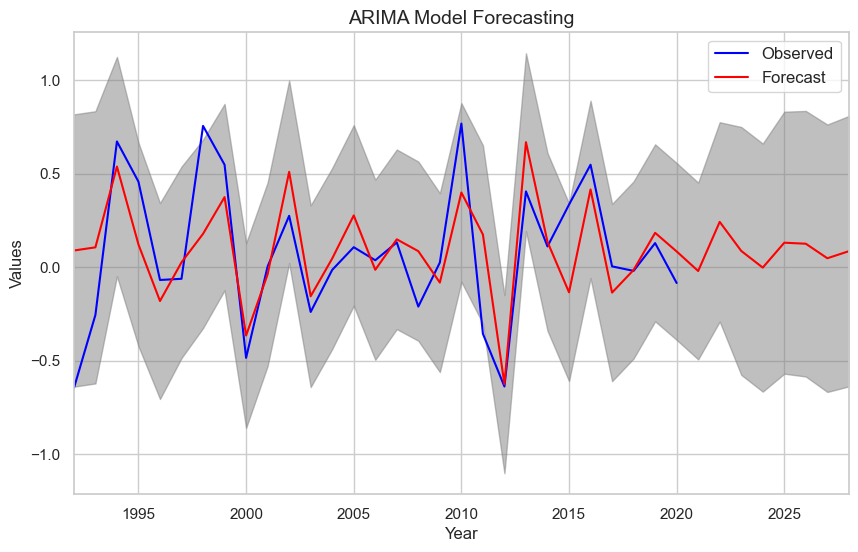

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.stattools import adfuller

# Set the index to datetime
emission_data_tsa_temp.index = pd.to_datetime(emission_data_tsa_temp.index, format='%Y')

# Perform the ADF test
result = adfuller(emission_data_tsa_temp['Asia'])
print("The p-value for the ADF test is ", result[1])  # it's a random walk with a drift

# Plot the ACF
plot_acf(emission_data_tsa_temp['Asia'], lags=30)
plt.show()

# Taking the second difference of Asia to make it stationary
emission_data_tsa_asia_chg = emission_data_tsa_temp['Asia'].diff(2)
emission_data_tsa_asia_chg = emission_data_tsa_asia_chg.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the ACF
plot_acf(emission_data_tsa_asia_chg, lags=28, ax=axes[0])

# Plot the PACF
plot_pacf(emission_data_tsa_asia_chg, lags=13, ax=axes[1])
plt.show()

# Function to fit ARIMA model
def fitARIMAModel(emission_data, order):
    mod = ARIMA(emission_data, order=order)
    res = mod.fit()
    print('The AIC for order:', order, 'is:', res.aic)

# Function to find the best AIC score
def bestAICScore(emission_data, p_values, d_values, q_values):
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    fitARIMAModel(emission_data, order)
                except:
                    continue

p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 2)

bestAICScore(emission_data_tsa_asia_chg, p_values, d_values, q_values)

# ARMA model
mod = ARIMA(emission_data_tsa_asia_chg, order=(2, 0, 1))
res = mod.fit()

# ARMA model with trend forecasting
fig, ax = plt.subplots(figsize=(10, 6))
emission_data_tsa_asia_chg.plot(ax=ax, color='blue', label='Observed')

# Extend the forecast to 2028 and change the forecast color to red
plot_predict(res, start='1992', end='2028', ax=ax, plot_insample=False)

# Changing the forecast color to red
lines = ax.get_lines()
lines[1].set_color('red')  # The forecast line is usually the second line

ax.set_title('ARIMA Model Forecasting', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.legend(['Observed', 'Forecast'], fontsize=12)
plt.show()
